
<div class="alert alert-block alert-info">
   <h2 align="center"> <center><b> Reinforcement Learning Project - Sanding Task </b></center></h2>

<br>
<center><font size="3">This notebook is part of the teaching materials for ELEC-E8125</font></center>
<center><font size="3">Sep 4, 2024 - Nov 30, 2024</font></center>
<center><font size="3">Aalto University</font></center>
</div>


<a id='TOC'></a>

<div class="alert alert-block alert-success">
    
# Table of contents
* <a href='#1.'> 1. Learning Objectives</a>
* <a href='#2.'> 2. Introduction </a>
* <a href='#3.'> 3. Sanding Task </a>
* <a href='#4.'> 4. Code Structure and Files </a>
* <a href='#5.'> 5. Tasks </a>
* <a href='#6.'> 6. Implementation requirements </a>
* <a href='#7.'> 7. Evaluation / grading </a>
* <a href='#8.'> 8. Start the project </a>
* <a href='#9'> 9. Submission </a>
* <a href='#10'> 10. Feedback  </a>

<a href='#T1'><b>Student Task 1.</b> Implement the basic PPO or DDPG algorithm. Modify either 'ddpg_agent.py' or 'ppo_agent.py' in the folder 'algos'. Run the algorithm in the easy and medium sanding environments. Report the results, that is, training plots and test performances. (30 points)</a>

<a href='#T2'><b>Student Task 2.</b> Extend DDPG/PPO to improve the performance based on the hints in Section 5. Note the instructions on the extensions in Section 5. You can should use either the file 'ddpg_extension.py' or 'ppo_extension.py' in folder 'algos'. Do the following: 1. The base algorithm's performance must be improved such that the agent succeeds in the moderate difficulty environment. 2. Follow the provided structure such that it can be tested with function 'test(agent)'. (40 points)</a>

<a href='#Q1'><b>Student Question 1.</b> Answer the question regarding how you extended PPO/DDPG. (30 points) </a>

<a href='#T3'><b>Student Task 3.</b> This task gives bonus points to the project works that get highest performance. The projects will be evaluated based on their performance in the difficult Task 3 environment and then ranked. The best performing project (100% ranked) will receive 20 bonus points, 95% ranked or above will get 10 bonus points. (+20 points) </a>

**Total Points:** 100 (+20)

<div style="background-color:lightcoral; padding:10px; border-radius:5px">

# <span style="color:white">0. Group Information (IMPORTANT)</span>

## <span style="color:white">Please read the instructions and fill in your group information</span>

- This project work is intended to be completed in groups of 2 students, who will share the same grade. If you are looking for a project partner, please join the project channel on Zulip and introduce yourself. 

- However, it is also acceptable to complete the project individually. 

- **Only one student** from each group should submit the project.

- Please provide the **NAME (First Name Last Name)**, **Aalto Student ID**, and **Aalto User Name** of each group member. For example:
    - Member 0: Jane Doe, 123456, janed5

</div>


<div style="background-color:lightcoral; padding:10px; border-radius:5px; margin-bottom: 10px">

# <span style="color:white">### TODO: Fill in Your Group Information HERE</span>

DOUBLE CLICK TO EDIT
- **Member 1:**
  - Name: Arnau Bayer Mena
  - Aalto Student ID: 103387332
  - Aalto User Name: bayera1

- **Member 2 :**
  - Name: Giacomo Montagna
  - Aalto Student ID: 103382942
  - Aalto User Name: montagg1

</div>


# 1. Learning Objectives <a id='1.'></a>
In the project work, students move to a more independent working style compared with the exercises. In the exercises, instructions and template code for reinforcement learning algorithms were provided. However, in the project work the students are given **a new task** that they need to solve using reinforcement learning methods discussed during the course. The students need to decide which method they will use (either PPO or DDPG), extend the method, and explain why. Students may take advantage of code that they have already developed in the exercises or which was part of the exercises.


# 2. Introduction <a id='2.'></a>

The goal of the project work is to optimize the behavior of a sanding robot using reinforcement learning such that the robot avoids already painted areas but sands areas that need sanding. We give now a general motivation and task description. [Section 3](#3.) provides a more detailed task definition.

<center>
<figure style="display: inline-block; text-align: center; margin: 10px;">
  <img src="imgs/robot_sanding.png" width="width:40%"/>
</figure>
</center>
<center>Figure 1: Illustration of a robot sanding a planar area. Image source: (https://www.youtube.com/watch?v=TG-3NZzoZiM)</center>

The robot operates on a 2-D plane and should hit a set of "sanding areas" using the sanding tool equipped. At the same time the robot has to avoid specific "painted areas" which are also defined as part of the system state. The sanding areas and painted areas are defined as part of the state space. The robot gets a negative reward for hitting painted areas and a positive reward for sanding sanding areas.

The idea is to optimize the behavior of the robot using reinforcement learning based on either the PPO or DDPG algorithm. You should extend PPO or DDPG such that you get higher performance in the more challenging versions of the sanding task.

[Section 3](#3.) defines the sanding task. [Section 4](#4.) shows the structure of the provided file directory. [Section 5](#5.) discusses the **mandatory project requirements** and **possible extensions** to the basic PPO and DDPG algorithms. [Section 6](#6.) discusses the implementation requirements. [Section 7](#7.a) describes how the project is evaluated and graded. In [Section 8](#8.), you will add your implementation, perform the tasks and answer questions. [Section 9](#9.) is a preliminary check. In [Section 10](#10.), you can provide feedback on the project work.

# 3. Sanding Task <a id='3.'></a>
The primary objective in this project is to optimize a sanding robot's behavior, aiming to maximize the expected cumulative reward $ J(\theta) = \mathbb{E}_{\pi_{\theta}}\left[ \sum_{t=0}^{\infty} \gamma^t r_t \right] $. The simulator for the sanding task is provided in the "sanding.py" Python file. This section defines the sanding task. Please, see below.

## 3.1. Markov Decision Process (MDP)
- **Robot Characteristics**: The robot is visualized as a <span style="color:purple">purple</span> circle with a radius of 10, operating on a 2D plane. The x and y coordinates range from -50 to 50.
- **Sanding & No-Sanding Areas**: There are sanding (<span style="color:green">green</span>) and no-sanding (<span style="color:red">red</span>) areas, each with a radius of 10. Their configurations vary based on the task.
  
### 3.1.1. State Representation
A state \( s \) is defined as:

$s = [(x_{\text{ROBOT}}, y_{\text{ROBOT}}), (x_{\text{SAND}}, y_{\text{SAND}})_1, \dots,
    (x_{\text{SAND}}, y_{\text{SAND}})_N, (x_{\text{NOSAND}}, y_{\text{NOSAND}})_1, \dots,
    (x_{\text{NOSAND}}, y_{\text{NOSAND}})_M)]$

- $N$ is the number of sanding areas (circles)
- $M$ is the number of no-sanding areas (circles) 
- $(x_{\text{ROBOT}}, y_{\text{ROBOT}})$ : Robot's current location
- $(x_{\text{SAND}}, y_{\text{SAND}})_i$: Location of the $i$th sanding area
- $(x_{\text{NOSAND}}, y_{\text{NOSAND}})_j$: Location of the $j$th no-sanding area

### 3.1.2. Action Space

An action $a$ consists of target coordinates for the robot:

$a = (a_x, a_y) \in \mathbb{R}^2$

$a_x, a_y$ selects the current target coordinates of the robot arm. A PD-controller~\cite{X} trys to move the robot arm from the current coordinates $(x_{\text{ROBOT}}, y_{\text{ROBOT}})$ to the target coordinates $a_x, a_y$. You do not need to necessarily understand how exactly the PD-controller works but the controller may not always move the robot to the correct coordinates in one time step, and, it may also overshoot the target location. Please, see below for a visualization of this behavior.


### 3.1.3. Reward definition

The reward is defined as the number of sanding locations the robot touches minus the number of no-sanding locations the robot touches, that is,
$r_t = $ number of sanded sanding locations - number of sanded no-sanding locations . 

The robot can only sand a sanding or no-sanding location once. All sanding and no-sanding locations that are touched by the robot will be moved outside the operating area, that is, those locations will be outside the operating area in the subsequent time step. 


## 3.2 Scenarios with different difficulty levels: <a id='3.1'></a>


### Environment Breakdown
#### Environment 1: Easy Environment 

<p align="center">
  <figure style="display:inline-block; text-align: center; margin: 10px;">
    <img src="imgs/easy_env.gif" alt="Easy Environment" width="180"/>
  </figure>
</p>

- **No-Sanding Spots**: 1 (<span style="color:red">red</span>), fixed location in the center
- **Sanding Spots**: 1 (<span style="color:green">green</span>), randomly generated without overlapping
- **PD Control**: Movement to target \((a_x, a_y)\) with random number of PD iterations
- **Notes**: Hollow circle indicates target, <span style="color:purple">purple</span> circle is the robot

#### Environment 2: Moderate Difficulty Environment 
<p align="center">
  <figure style="display: inline-block; text-align: center; margin: 10px;">
    <img src="imgs/middle_env.gif" alt="Easy Environment" width="180"/>
  </figure>
</p>

- **No-Sanding Spots**: 2 (<span style="color:red">red</span>), fixed locations along the diagonal
- **Sanding Spots**: 2 (<span style="color:green">green</span>), randomly generated without overlapping
- **Control**: Movement to target \((a_x, a_y)\) with random number of PD iterations
- **Notes**: Hollow circle indicates target, <span style="color:purple">purple</span> circle is the robot

#### Environment 3: Difficult Environment 
<p align="center">
  <figure style="display: inline-block; text-align: center; margin: 10px;">
    <img src="imgs/difficult_env.gif" alt="Easy Environment" width="180"/>
  </figure>
</p>

- **No-Sanding Spots**: 4 (<span style="color:red">red</span>), fixed locations as a square
- **Sanding Spots**: 4 (<span style="color:green">green</span>), one of which is fixed in the center while other three are ramdomly generated without overlapping
- **Control**: Movement to target \((a_x, a_y)\) with random number of PD iterations
- **Notes**: Hollow circle indicates target, <span style="color:purple">purple</span> circle is the robot

# 4 Code Structure & Files <a id='4.'></a>

```project.ipynb``` is the main file needed to be modified for this project, but you can also add other auxiliary files if needed.  
```
├───cfg
│   ├───algo                       # Algorithm configurations
│   ├───envs                       # Environment configurations
├───imgs                           # Images used in the notebook task description   
├───utils                          # Utility functions  
├───algo                           # Your agents (PPO/DDPG)
├───results                        # Training results                          
├───project.ipynb                  
└───sanding.py                     # Sanding environment

```


## 4.1 Execution time <a id='4.1'></a>

The training of DDPG/PPO may take more than 30 min for each run depending on the server load. If you have problems with the training time, you can train DDPG/PPO locally on your computer or a server.

# 5. Tasks <a id='5.'></a>

## I. Tasks 1: use following algorithms to solve the robot sanding task. 
  - **PPO** (you can take code from ex1 as a basis)
  - **DDPG** (you can take code from ex6 as a basis)

Implementations from the exercises can be used and extended, otherwise please implement algorithms yourself. For learning purposes, you can look at existing implementations on the Internet.

- We do not want to focus on hyperparameter or neural network architecture tuning. Therefore, use the following choices:
  - For PPO, use the neural network policy configuration found in exercise 1 code.
  - For DDPG, use the neural network policy and value function configuration found in exercise 6 code.
  - <span style="color:red">We provide the hyper-parameters in configuration files 'cfg/algo/*', DO NOT change the parameters there</span>

- **No copying of code! Code should be original, written by yourself or taken from the exercises.**

- You should extend or modify your basic PPO/DDPG algorithm. For each modification or extension, answer the multiple choice questions.

- More detailed instructions are given in the following sections. If you are not sure what you are allowed or not allowed to do, contact the TAs, preferably on Zulip so that also others may learn from the question.

**Note: not following the requirements may lead to point deduction or rejection of the project work.**





## II. Task 2: possible extensions to improve performance

After the basic PPO/DDPG implementation, you shall try to do some technical improvements to improve the agent's performance. Below we list several possible extensions you can apply to improve the performance. 
- <span style="color:red">If you choose to implement PPO, for task 2 you can choose either Dual Clip PPO or Self imitation learning</span>
- <span style="color:red">If you choose to implement DDPG, for task 2 you can choose either LNSS or Self imitation learning</span>
- <span style="color:red">You should read the paper to do your own implementation and answer the related questions in Student Questions 1.</span>
- <span style="color:red">The codes shall be implemented in "algos/ddpg_extension.py" or "algos/ppo_extension.py"</span>

### PPO based Extension: **Dual Clip PPO** 
- Implement it if your base algorithm is PPO.
- It is designed to constrain updates to the policy, effectively preventing it from diverging excessively from its preceding iterations. This approach thereby ensures a more stable and reliable learning process during training. 
- Ref: ([Ye et al., 2020](https://ojs.aaai.org/index.php/AAAI/article/view/6144)).



### DDPG based Extension: **LNSS**
- Implement it if your base algorithm is DDPG.
- Its core idea is to improve N-step bootstrapping for off-policy RL like DDPG. It was empirically suggested that n-step methods perform better than single-step methods since n-step returns propagate rewards to relevant state-action pairs more efficientlyy.
- Ref([Junmin et al., 2023](https://proceedings.neurips.cc/paper_files/paper/2023/file/29ef811e72b2b97cf18dd5d866b0f472-Paper-Conference.pdf)).

### General Extension: **Self imitation learning**
- <span style="color:red">Either you implemented PPO or DDPG, you can choose to implement it instead of Dual Clip PPO or LN</span>
- If you want to try a more general trick that can be used for any RL, you can implement self-imitatin learning.
- It exploits past good experiences to drive deep exploration. 
- Ref:([Oh et al., 2018](https://proceedings.mlr.press/v80/oh18b.html)).

## III. Hints & Tips

### a) Hints
- Due to the multidimensional actions, when using a Gaussian policy, remember to use a multivariate Gaussian probability distribution, or, product of standard Gaussian distributions that corresponds to a multivariate Gaussian distribution with a diagonal covariance matrix.




# <span> 6. Implementation requirements </span> <a id='6.'></a>

### <span> Your implemented algorithm must be compatible with the below requirements. This is the default behavior, however make sure not to disrupt it.</span>

## I. Data Saving Format

### a) Training Logs: 
During the training, your code shall create a CSV file as the training log.

  - This log should output a CSV file with the following format:
    ```
    ,episode_length,ep_reward,episodes,total_step,average_return
    0,20,0.0,99,2000,-0.13
    1,20,0.0,199,4000,0.02
    ...
    ```
  - The training log should be saved as:
    `results/<environment name>/<algorithm name>/logging/logs_<seed number>.csv`
    
    For example:
    `results/SandingEnvDifficult/ddpg/logging/logs_0.csv`
    

### b) Model Weights

During/after training, the policy/critic weights should be saved in the path:

  `results/<environment name>/<algorithm name>/model/model_parameters_<seed number>.pt`
  
  For example:
  
  `results/SandingEnvDifficult/ddpg/model/model_parameters_0.pt`




## II. Visualization Plot Functions

Ensure that your implemented algorithm is compatible with the functions located in `utils/common_utils.py`:

- **Single Training Curve**: 
  - Function: `plot_reward(path, seed, env_name)`
  - Description: Plots the training curve of a single algorithm, trained with a specific seed.
  
- **Multiple Training Curves**: 
  - Function: `plot_algorithm_training(path, seeds, env_name)`
  - Description: Plots the training curves of a single algorithm, trained with multiple specific random seeds.
  - Example: `seeds=[0,1,2]`
  
- **Comparison of Training Performances**: 
  - Function: `compare_algorithm_training(algo1, algo2, seeds)`
  - Description: Given two configured algorithms/agents, this function will generate comparison plots of their training performances.


## III. <span style="color:red"> Configurations </span>

We provide the hyperparameters in 'cfg/algo', use those configuration files to initialize your agent. Example refer to following code. You should not change any parameters there.

**Usage Example**:
```python
config = setup(algo='ppo', env='middle')
    config["seed"] = 0
    agent = PPOAgent(config)
```

## IV. <span style="color:red"> Training implementation </span>

To ensure compatibility with the setup function, your implemented algorithm must follow the specified protocol:

- **Function**: `setup(algo=None, env='easy', cfg_args={})`
  - **Purpose**: Used for setting up the configurations.
  - **Usage Example**:
    ```python
    config = setup(algo='ppo', env='middle')
    config["seed"] = 0
    agent = PPOAgent(config)
    agent.train()
    ```
  - **Parameters**:
    - `algo`: Specify the algorithm. Use either `'ppo'` or `'ddpg'`.
    - `env`: Specify the environment. Options include `'easy'`, `'middle'`, or `'difficult'`.

## V. <span style="color:red"> Test implementation </span>

To ensure compatibility with the setup function, your implemented algorithm must follow the specified protocol:

- **Function**: `test`
  - **Purpose**: Used for test the performance of the agent.
  - **Usage Example**:
    ```python
    test(agent, env_name='easy', algo_name='ddpg')
    ```

## VI. <span style="color:red"> Access </span>

You should not modify any files in paths:
- 'cfg/'
- 'utils/'
- 'sanding.py'

## VI. <span style="color:red"> Other tips </span>

1. If you choose DDPG based on ex6, you should be careful with function 'get_action()'. You should not use 
```python
    if self.buffer_ptr < self.random_transition:
``` 
if you want to evluate the agent's performance when using:
```python
test(agent, env_name='easy', algo_name='ddpg')
```

2. The standard deviation of gaussian policy in PPO is crucial for performance.

### <span style="color:red">Your implemented algorithm must be compatible with the above requirements; otherwise, the code will be considered invalid.</span>


# 7. Evaluation / Grading <a id='7.'></a>

### Grading
The general evaluation and grading process will take into account the following aspects:

- In Tasks 1, the grading will be based on the performance comparison between your algorithms and the respective baseline. 
    - If your implementation is able to run successfully, you get 10 points.
    - <span style="color:red"> In order to get the full points of task 1, your implementation must have no statistically significant difference than our baseline performance (the average performance is provided below) </span>.
    - We implmented the t-test in a hidden cell to automatically do the significant test and grading.
- For Task 2 the grading will focus on the implemented extensions. 
    - If your extension is able to run successfully, you get 10 points.
    - <span style="color:red"> In order to get the full points of task 2, the extension must have statistically significant better performance than the base algorithm </span>. 
    - We implmented the t-test in a hidden cell to do the check.
- In Question 1, the evaluation will consider the created extensions. You will get points by correctly answering the given questions.
- In Task 3, there will be a competitive grading approach: all projects will be evaluated based on their performance in the difficult Task 3 environment and then ranked. The best performing project (100% ranked) will receive 20 bonus points, 95% ranked or above will get 10 bonus points.

### Baseline Performance:

The following values were recorded after running experiments for the base algorithms in different environments. Differences due to random conditions are expected.

#### For PPO:
- PPO (Easy Environment): mean: 0.75
- PPO (Middle Environment): mean: 1.14

#### For DDPG:
- DDPG (Easy Environment): mean: 0.75
- DDPG (Middle Environment): mean: 1.19


#### Note:
    - The PPO baseline is derived from the code used in Exercise 1, featuring a Gaussian policy with an isotropic covariance matrix. (For more details, please google "isotropic covariance matrix"). The log standard deviation of the policy is linearly scheduled from the initial log standard deviation to zero during the training.

    - The DDPG baseline originates from the code used in Exercise 6. The exploration noise added to the action follows a Gaussian distribution (mean is 0 and standard deviation is 0.3).

# 8. Start the project <a id='8.'></a>

This section contains below all the source code including your implementation and the tasks and question that need to be filled. 


<div class=" alert alert-warning">
    <h3><b>Initialize the code</b> </h3>
    Run the following section to start the task. DO NOT MODIFY THE CODE
</div>

In [1]:
#Make sure to change this part before submission
skip_training = False  # Set this flag to True before validation and submission

# Make sure to change the algorithm_implemented variable to the algorithm you implemented
# This variable will be used in the evaluation and will determine which environment to use
# for both the baseline and the extension

algorithm_implemented = "ppo" # "ddpg" or "ppo"

In [2]:
"TEST CELL"

'TEST CELL'

In [3]:
!pip install  imageio

In [4]:
%load_ext autoreload
%autoreload 2

import yaml
import gymnasium as gym

import numpy as np 
from types import SimpleNamespace as SN
from pathlib import Path
import copy
import utils.common_utils as cu
from utils.recorder import RecordVideo

# uncomment the following line to import the agent
# from algos.ddpg_agent import DDPGAgent
from algos.ppo_agent import PPOAgent

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
Users of this version of Gym should be able to simply replace 'import gym' with 'import gymnasium as gym' in the vast majority of cases.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


In [5]:
# Diagnostic cell to run in the notebook (place in cell 14)
try:
    print("algorithm_implemented:", algorithm_implemented)
    print("skip_training:", skip_training)
except NameError as e:
    print("NameError:", e)
    print("-> Run the cell that defines these variables (e.g. cell 10) or re-execute the notebook cells in order.")

# Show currently defined variables in the kernel
get_ipython().run_line_magic('whos', '')

algorithm_implemented: ppo
skip_training: False
Variable                Type      Data/Info
-------------------------------------------
PPOAgent                type      <class 'algos.ppo_agent.PPOAgent'>
Path                    type      <class 'pathlib.Path'>
RecordVideo             type      <class 'utils.recorder.RecordVideo'>
SN                      type      <class 'types.SimpleNamespace'>
algorithm_implemented   str       ppo
copy                    module    <module 'copy' from 'C:\\<...>n2kfra8p0\\Lib\\copy.py'>
cu                      module    <module 'utils.common_uti<...>\utils\\common_utils.py'>
gym                     module    <module 'gymnasium' from <...>\gymnasium\\__init__.py'>
np                      module    <module 'numpy' from 'c:\<...>ges\\numpy\\__init__.py'>
skip_training           bool      False
yaml                    module    <module 'yaml' from 'c:\\<...>ages\\yaml\\__init__.py'>


In [6]:

# Function to test a trained policy
def test(agent, env_name, algo_name):
    # Load model
    agent.load_model()
    print("Testing...")
    total_test_reward, total_test_len = 0, 0
    returns = []
    
    cur_dir=Path().cwd()
    cfg_path= cur_dir/'cfg'
    # read configuration parameters:
    cfg={'cfg_path': cfg_path, 'algo_name': algo_name}
    env_cfg=yaml.safe_load(open(cfg_path /'envs'/f'{env_name}_env.yaml', 'r'))
    
    # prepare folders to store results
    work_dir = cur_dir/'results'/env_cfg["env_name"]/algo_name
    video_test_dir=work_dir/"video"/"test"
    rng = np.random.default_rng(42)
    
    for ep in range(agent.cfg.test_episodes):
        seed = rng.integers(low=1, high=1000)
        observation, _ = agent.env.reset(seed=int(seed))
        test_reward, test_len, done = 0, 0, False
        
        if ep%100==0:
            frames = []

            while not done and test_len < agent.cfg.max_episode_steps:
                action, _ = agent.get_action(observation, evaluation=True)
                observation, reward, done, truncated, info = agent.env.step(action.flatten())
                fs = agent.env.render()
                frames = frames+fs
                test_reward += reward
                test_len += 1
            total_test_reward += test_reward
            total_test_len += test_len
            returns.append(test_reward)
            cu.save_rgb_arrays_to_gif(frames, video_test_dir/('_seed_'+str(agent.seed)+'_ep_'+str(ep)+'.gif'))
        else:
            
            while not done and test_len < agent.cfg.max_episode_steps:
                action, _ = agent.get_action(observation, evaluation=True)
                observation, reward, done, truncated, info = agent.env.step(action.flatten())
                test_reward += reward
                test_len += 1
            total_test_reward += test_reward
            total_test_len += test_len
            returns.append(test_reward)
       

    print(f"Average test reward over {len(returns)} episodes: {total_test_reward/agent.cfg.test_episodes},+- {np.std(np.array(returns))}; \
        Average episode length: {total_test_len/agent.cfg.test_episodes}")
    return returns


In [7]:
# Setup: read the configurations and generate the environment.
def setup(algo=None, env='easy', cfg_args={}, render=False, train_episodes=None):
    # set the paths
    cur_dir=Path().cwd()
    cfg_path= cur_dir/'cfg'
    
    # read configuration parameters:
    cfg={'cfg_path': cfg_path, 'algo_name': algo}
    env_cfg=yaml.safe_load(open(cfg_path /'envs'/f'{env}_env.yaml', 'r'))
    algo_cfg=yaml.safe_load(open(cfg_path /'algo'/f'{algo}.yaml', 'r'))
    cfg.update(env_cfg)
    cfg.update(algo_cfg)
    cfg.update(cfg_args)
    
    # forcely change train_episodes
    if train_episodes is None:
        True
    else:
        cfg["train_episodes"] = train_episodes
    
    # prepare folders to store results
    work_dir = cur_dir/'results'/cfg["env_name"]/str(algo)
    model_dir=work_dir/"model"
    logging_dir=work_dir/"logging"
    video_train_dir=work_dir/"video"/"train"
    video_test_dir=work_dir/"video"/"test"
    for dir in [work_dir, model_dir, logging_dir, video_train_dir, video_test_dir]:
        cu.make_dir(dir)
        
    cfg.update({'work_dir':work_dir, "model_dir":model_dir, "logging_dir": logging_dir, "video_train_dir": video_train_dir, "video_test_dir": video_test_dir})
    cfg = SN(**cfg)
    
    # set seed
    if cfg.seed == None:
        seed = np.random.randint(low=1, high=1000)
    else:
        seed = cfg.seed
    
    ## Create environment
    env=cu.create_env(cfg_path /'envs'/f'{env}_env.yaml')

   
    if cfg.save_video:
        # During testing, save every episode
        if cfg.testing:
            ep_trigger = 1
            video_path = cfg.video_test_dir
        # During training, save every 50th episode
        else:
            ep_trigger = 1000   # Save video every 50 episodes
            video_path = cfg.video_train_dir
        
        if render:
            env = RecordVideo(
                env, video_path,
                episode_trigger=lambda x: x % ep_trigger == 0,
                name_prefix=cfg.exp_name)


    eval_env=copy.deepcopy(env)
    env.reset(seed=seed) # we only set the seed here. During training, we don't have to set the seed when performing reset().
    eval_env.reset(seed=seed+1000)
    eval_env=None # For simplicity, we don't evaluate the performance during training.
        
    # Get dimensionalities of actions and observations
    action_space_dim = cu.get_space_dim(env.action_space)
    observation_space_dim = cu.get_space_dim(env.observation_space)
    
    config={
        "args": cfg,
        "env":env,
        "eval_env":eval_env,
        "action_space_dim": action_space_dim,
        "observation_space_dim": observation_space_dim,
        "seed":seed
    }
    return config


<a id='T1'></a>
<div class=" alert alert-warning">
    <h3><b>Student Task 1</b> (30 points) </h3> 
    Implement the basic PPO or DDPG algorithm. Modify either the file 'ddpg_agent.py' or 'ppo_agent.py' in the folder 'algos'. 
    
    1. Choose PPO or DDPG
    
    2. You can check our provided base's mean performance to check if your implementation's performance is acceptable. 
    
    2. Please document your results here, including the training plots and test performance.
    
    3. Adhere to the given structure to facilitate testing with 'setup' and 'test'  function.
    
    4. Run the algorithm in the 'easy' and 'middle' environments.
    
</div>

## Task 1.1: Train each agents' performance 

- Implement your algorithm (either DDPG or PPO) in algos/ddpg_agent.py or algos/ppo_agent.py
- After the implementation, train your algorithm with the following code
    - Train the algorithm in the first two environments
    - The code will train the algorithm with 3 random seeds
- Your code must be compatible with the following provided python code

**Below, you will find an example of how to test your code**

In [8]:
# This part is provided only for debugging
if skip_training == False:
    train_episodes = 1000  # Limit the number of training episode for a fast test
    
    config=setup(algo=algorithm_implemented, env='easy', train_episodes=train_episodes, render=False)
    
    config["seed"] = 43
    
    
    if config["args"].algo_name == 'ppo':
        agent=PPOAgent(config)
    elif config["args"].algo_name == 'ddpg':
        agent=DDPGAgent(config)
    else:
        raise Exception('Please use ppo or ddpg!')
    
    # Train the agent using the selected algorithm    
    agent.train()
    test(agent, 'easy', 'ppo')


c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\.venv\Lib\site-packages\gymnasium\spaces\box.py:236: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\.venv\Lib\site-packages\gymnasium\spaces\box.py:306: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(
c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\.venv\Lib\site-packages\gymnasium\utils\passive_env_checker.py:134: UserWarning: WARN: The obs returned by the `reset()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\.venv\Lib\site-packages\gymnasium\utils\passive_env_checker.py:158: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.w

Episode 99 Step 2000: Avg return 0.15, Episode length 20, logstd tensor([0.6931, 0.6931])
Episode 199 Step 4000: Avg return 0.23, Episode length 20, logstd tensor([0.6238, 0.6238])
Episode 299 Step 6000: Avg return 0.16, Episode length 20, logstd tensor([0.5545, 0.5545])
Episode 399 Step 8000: Avg return 0.19, Episode length 20, logstd tensor([0.4852, 0.4852])
Episode 499 Step 10000: Avg return 0.31, Episode length 20, logstd tensor([0.4159, 0.4159])
Episode 599 Step 12000: Avg return 0.23, Episode length 20, logstd tensor([0.3466, 0.3466])
Episode 699 Step 14000: Avg return 0.22, Episode length 20, logstd tensor([0.2773, 0.2773])
Episode 799 Step 16000: Avg return 0.25, Episode length 20, logstd tensor([0.2079, 0.2079])
Episode 899 Step 18000: Avg return 0.29, Episode length 20, logstd tensor([0.1386, 0.1386])
Episode 999 Step 20000: Avg return 0.15, Episode length 20, logstd tensor([0.0693, 0.0693])
Saved model to c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\r

c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\.venv\Lib\site-packages\gymnasium\utils\passive_env_checker.py:270: UserWarning: WARN: RGB-array rendering should return a numpy array, got <class 'list'>
  logger.warn(


Saved GIF to c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\video\test\_seed_43_ep_0.gif
Saved GIF to c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\video\test\_seed_43_ep_100.gif
Saved GIF to c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\video\test\_seed_43_ep_200.gif
Saved GIF to c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\video\test\_seed_43_ep_300.gif
Saved GIF to c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\video\test\_seed_43_ep_400.gif
Average test reward over 500 episodes: 0.168,+- 0.3738662862575335;         Average episode length: 20.0


**If everything is fine, we start the proper training now**

In [9]:
## Code block for training and testing an agent using the implemented algorithm

if skip_training == False:
    # Choose either PPO or DDPG
    implemented_algo = algorithm_implemented #'ppo' or 'ddpg'
    
    # Loop over the three difficulty levels
    environment = 'easy'
    training_seeds = []
        
    # Train the algorithm with a specific random seed.
    # In total, we train the algorithm with three random seeds [0, 1, 2].
    for i in range(3):
        config=setup(algo=implemented_algo, env=environment, render=True)
        config["seed"] = i
        training_seeds.append(i)
        if config["args"].algo_name == 'ppo':
            agent=PPOAgent(config)
        elif config["args"].algo_name == 'ddpg':
            agent=DDPGAgent(config)
        else:
            raise Exception('Please use ppo or ddpg!')
    
        # Train the agent using selected algorithm    
        agent.train()
        

c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\.venv\Lib\site-packages\gymnasium\envs\registration.py:636: UserWarning: WARN: Overriding environment SandingEnvEasy already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\.venv\Lib\site-packages\gymnasium\spaces\box.py:236: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\.venv\Lib\site-packages\gymnasium\spaces\box.py:306: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(
c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\utils\recorder.py:250: UserWarning: WARN: Overwriting existing videos at c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\vid

MoviePy - Building video c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\video\train\project-episode-0.mp4.
MoviePy - Writing video c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\video\train\project-episode-0.mp4



MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\video\train\project-episode-0.mp4


MoviePy - Building video c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\video\train\project-episode-0.mp4.
MoviePy - Writing video c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\video\train\project-episode-0.mp4



MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\video\train\project-episode-0.mp4
Episode 99 Step 2000: Avg return 0.20, Episode length 20, logstd tensor([0.6931, 0.6931])
Episode 199 Step 4000: Avg return 0.18, Episode length 20, logstd tensor([0.6793, 0.6793])
Episode 299 Step 6000: Avg return 0.25, Episode length 20, logstd tensor([0.6654, 0.6654])
Episode 399 Step 8000: Avg return 0.36, Episode length 20, logstd tensor([0.6516, 0.6516])
Episode 499 Step 10000: Avg return 0.34, Episode length 20, logstd tensor([0.6377, 0.6377])
Episode 599 Step 12000: Avg return 0.40, Episode length 20, logstd tensor([0.6238, 0.6238])
Episode 699 Step 14000: Avg return 0.46, Episode length 20, logstd tensor([0.6100, 0.6100])
Episode 799 Step 16000: Avg return 0.59, Episode length 20, logstd tensor([0.5961, 0.5961])
Episode 899 Step 18000: Avg return 0.56, Episode length 20, logstd tensor([0.5822, 0.5822])
Episode 

MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\video\train\project-episode-1000.mp4
Episode 1099 Step 22000: Avg return 0.59, Episode length 20, logstd tensor([0.5545, 0.5545])
Episode 1199 Step 24000: Avg return 0.61, Episode length 20, logstd tensor([0.5407, 0.5407])
Episode 1299 Step 26000: Avg return 0.61, Episode length 20, logstd tensor([0.5268, 0.5268])
Episode 1399 Step 28000: Avg return 0.73, Episode length 20, logstd tensor([0.5129, 0.5129])
Episode 1499 Step 30000: Avg return 0.67, Episode length 20, logstd tensor([0.4991, 0.4991])
Episode 1599 Step 32000: Avg return 0.72, Episode length 20, logstd tensor([0.4852, 0.4852])
Episode 1699 Step 34000: Avg return 0.65, Episode length 20, logstd tensor([0.4713, 0.4713])
Episode 1799 Step 36000: Avg return 0.68, Episode length 20, logstd tensor([0.4575, 0.4575])
Episode 1899 Step 38000: Avg return 0.70, Episode length 20, logstd tensor([0.4436, 

MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\video\train\project-episode-2000.mp4
Episode 2099 Step 42000: Avg return 0.69, Episode length 20, logstd tensor([0.4159, 0.4159])
Episode 2199 Step 44000: Avg return 0.73, Episode length 20, logstd tensor([0.4019, 0.4019])
Episode 2299 Step 46000: Avg return 0.68, Episode length 20, logstd tensor([0.3880, 0.3880])
Episode 2399 Step 48000: Avg return 0.74, Episode length 20, logstd tensor([0.3742, 0.3742])
Episode 2499 Step 50000: Avg return 0.68, Episode length 20, logstd tensor([0.3603, 0.3603])
Episode 2599 Step 52000: Avg return 0.72, Episode length 20, logstd tensor([0.3464, 0.3464])
Episode 2699 Step 54000: Avg return 0.84, Episode length 20, logstd tensor([0.3326, 0.3326])
Episode 2799 Step 56000: Avg return 0.80, Episode length 20, logstd tensor([0.3187, 0.3187])
Episode 2899 Step 58000: Avg return 0.77, Episode length 20, logstd tensor([0.3048, 

MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\video\train\project-episode-3000.mp4
Episode 3099 Step 62000: Avg return 0.72, Episode length 20, logstd tensor([0.2771, 0.2771])
Episode 3199 Step 64000: Avg return 0.80, Episode length 20, logstd tensor([0.2633, 0.2633])
Episode 3299 Step 66000: Avg return 0.80, Episode length 20, logstd tensor([0.2494, 0.2494])
Episode 3399 Step 68000: Avg return 0.71, Episode length 20, logstd tensor([0.2355, 0.2355])
Episode 3499 Step 70000: Avg return 0.76, Episode length 20, logstd tensor([0.2217, 0.2217])
Episode 3599 Step 72000: Avg return 0.81, Episode length 20, logstd tensor([0.2078, 0.2078])
Episode 3699 Step 74000: Avg return 0.80, Episode length 20, logstd tensor([0.1939, 0.1939])
Episode 3799 Step 76000: Avg return 0.75, Episode length 20, logstd tensor([0.1801, 0.1801])
Episode 3899 Step 78000: Avg return 0.69, Episode length 20, logstd tensor([0.1662, 

MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\video\train\project-episode-4000.mp4
Episode 4099 Step 82000: Avg return 0.78, Episode length 20, logstd tensor([0.1385, 0.1385])
Episode 4199 Step 84000: Avg return 0.70, Episode length 20, logstd tensor([0.1245, 0.1245])
Episode 4299 Step 86000: Avg return 0.83, Episode length 20, logstd tensor([0.1106, 0.1106])
Episode 4399 Step 88000: Avg return 0.73, Episode length 20, logstd tensor([0.0968, 0.0968])
Episode 4499 Step 90000: Avg return 0.76, Episode length 20, logstd tensor([0.0829, 0.0829])
Episode 4599 Step 92000: Avg return 0.73, Episode length 20, logstd tensor([0.0690, 0.0690])
Episode 4699 Step 94000: Avg return 0.75, Episode length 20, logstd tensor([0.0552, 0.0552])
Episode 4799 Step 96000: Avg return 0.79, Episode length 20, logstd tensor([0.0413, 0.0413])
Episode 4899 Step 98000: Avg return 0.80, Episode length 20, logstd tensor([0.0274, 

MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\video\train\project-episode-5000.mp4
Saved model to c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\model/model_parameters_0.pt
logger and seed 0
c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\logging/logs_0.csv
------ Training finished ------
Total training time: 10.56 mins
MoviePy - Building video c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\video\train\project-episode-0.mp4.
MoviePy - Writing video c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\video\train\project-episode-0.mp4



MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\video\train\project-episode-0.mp4


MoviePy - Building video c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\video\train\project-episode-0.mp4.
MoviePy - Writing video c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\video\train\project-episode-0.mp4



MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\video\train\project-episode-0.mp4
Episode 99 Step 2000: Avg return 0.07, Episode length 20, logstd tensor([0.6931, 0.6931])
Episode 199 Step 4000: Avg return 0.08, Episode length 20, logstd tensor([0.6793, 0.6793])
Episode 299 Step 6000: Avg return 0.11, Episode length 20, logstd tensor([0.6654, 0.6654])
Episode 399 Step 8000: Avg return 0.22, Episode length 20, logstd tensor([0.6516, 0.6516])
Episode 499 Step 10000: Avg return 0.22, Episode length 20, logstd tensor([0.6377, 0.6377])
Episode 599 Step 12000: Avg return 0.13, Episode length 20, logstd tensor([0.6238, 0.6238])
Episode 699 Step 14000: Avg return 0.12, Episode length 20, logstd tensor([0.6100, 0.6100])
Episode 799 Step 16000: Avg return 0.23, Episode length 20, logstd tensor([0.5961, 0.5961])
Episode 899 Step 18000: Avg return 0.14, Episode length 20, logstd tensor([0.5822, 0.5822])
Episode 

MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\video\train\project-episode-1000.mp4
Episode 1099 Step 22000: Avg return 0.27, Episode length 20, logstd tensor([0.5545, 0.5545])
Episode 1199 Step 24000: Avg return 0.41, Episode length 20, logstd tensor([0.5407, 0.5407])
Episode 1299 Step 26000: Avg return 0.34, Episode length 20, logstd tensor([0.5268, 0.5268])
Episode 1399 Step 28000: Avg return 0.32, Episode length 20, logstd tensor([0.5129, 0.5129])
Episode 1499 Step 30000: Avg return 0.26, Episode length 20, logstd tensor([0.4991, 0.4991])
Episode 1599 Step 32000: Avg return 0.38, Episode length 20, logstd tensor([0.4852, 0.4852])
Episode 1699 Step 34000: Avg return 0.34, Episode length 20, logstd tensor([0.4713, 0.4713])
Episode 1799 Step 36000: Avg return 0.40, Episode length 20, logstd tensor([0.4575, 0.4575])
Episode 1899 Step 38000: Avg return 0.49, Episode length 20, logstd tensor([0.4436, 

MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\video\train\project-episode-2000.mp4
Episode 2099 Step 42000: Avg return 0.27, Episode length 20, logstd tensor([0.4159, 0.4159])
Episode 2199 Step 44000: Avg return 0.45, Episode length 20, logstd tensor([0.4019, 0.4019])
Episode 2299 Step 46000: Avg return 0.45, Episode length 20, logstd tensor([0.3880, 0.3880])
Episode 2399 Step 48000: Avg return 0.50, Episode length 20, logstd tensor([0.3742, 0.3742])
Episode 2499 Step 50000: Avg return 0.46, Episode length 20, logstd tensor([0.3603, 0.3603])
Episode 2599 Step 52000: Avg return 0.54, Episode length 20, logstd tensor([0.3464, 0.3464])
Episode 2699 Step 54000: Avg return 0.50, Episode length 20, logstd tensor([0.3326, 0.3326])
Episode 2799 Step 56000: Avg return 0.48, Episode length 20, logstd tensor([0.3187, 0.3187])
Episode 2899 Step 58000: Avg return 0.30, Episode length 20, logstd tensor([0.3048, 

MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\video\train\project-episode-3000.mp4
Episode 3099 Step 62000: Avg return 0.53, Episode length 20, logstd tensor([0.2771, 0.2771])
Episode 3199 Step 64000: Avg return 0.65, Episode length 20, logstd tensor([0.2633, 0.2633])
Episode 3299 Step 66000: Avg return 0.59, Episode length 20, logstd tensor([0.2494, 0.2494])
Episode 3399 Step 68000: Avg return 0.59, Episode length 20, logstd tensor([0.2355, 0.2355])
Episode 3499 Step 70000: Avg return 0.51, Episode length 20, logstd tensor([0.2217, 0.2217])
Episode 3599 Step 72000: Avg return 0.60, Episode length 20, logstd tensor([0.2078, 0.2078])
Episode 3699 Step 74000: Avg return 0.66, Episode length 20, logstd tensor([0.1939, 0.1939])
Episode 3799 Step 76000: Avg return 0.57, Episode length 20, logstd tensor([0.1801, 0.1801])
Episode 3899 Step 78000: Avg return 0.55, Episode length 20, logstd tensor([0.1662, 

MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\video\train\project-episode-4000.mp4
Episode 4099 Step 82000: Avg return 0.61, Episode length 20, logstd tensor([0.1385, 0.1385])
Episode 4199 Step 84000: Avg return 0.57, Episode length 20, logstd tensor([0.1245, 0.1245])
Episode 4299 Step 86000: Avg return 0.59, Episode length 20, logstd tensor([0.1106, 0.1106])
Episode 4399 Step 88000: Avg return 0.60, Episode length 20, logstd tensor([0.0968, 0.0968])
Episode 4499 Step 90000: Avg return 0.65, Episode length 20, logstd tensor([0.0829, 0.0829])
Episode 4599 Step 92000: Avg return 0.62, Episode length 20, logstd tensor([0.0690, 0.0690])
Episode 4699 Step 94000: Avg return 0.66, Episode length 20, logstd tensor([0.0552, 0.0552])
Episode 4799 Step 96000: Avg return 0.65, Episode length 20, logstd tensor([0.0413, 0.0413])
Episode 4899 Step 98000: Avg return 0.66, Episode length 20, logstd tensor([0.0274, 

MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\video\train\project-episode-5000.mp4
Saved model to c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\model/model_parameters_1.pt
logger and seed 1
c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\logging/logs_1.csv
------ Training finished ------
Total training time: 8.86 mins
MoviePy - Building video c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\video\train\project-episode-0.mp4.
MoviePy - Writing video c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\video\train\project-episode-0.mp4



MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\video\train\project-episode-0.mp4


MoviePy - Building video c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\video\train\project-episode-0.mp4.
MoviePy - Writing video c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\video\train\project-episode-0.mp4



MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\video\train\project-episode-0.mp4
Episode 99 Step 2000: Avg return 0.01, Episode length 20, logstd tensor([0.6931, 0.6931])
Episode 199 Step 4000: Avg return 0.15, Episode length 20, logstd tensor([0.6793, 0.6793])
Episode 299 Step 6000: Avg return -0.07, Episode length 20, logstd tensor([0.6654, 0.6654])
Episode 399 Step 8000: Avg return 0.24, Episode length 20, logstd tensor([0.6516, 0.6516])
Episode 499 Step 10000: Avg return 0.27, Episode length 20, logstd tensor([0.6377, 0.6377])
Episode 599 Step 12000: Avg return 0.38, Episode length 20, logstd tensor([0.6238, 0.6238])
Episode 699 Step 14000: Avg return 0.47, Episode length 20, logstd tensor([0.6100, 0.6100])
Episode 799 Step 16000: Avg return 0.46, Episode length 20, logstd tensor([0.5961, 0.5961])
Episode 899 Step 18000: Avg return 0.50, Episode length 20, logstd tensor([0.5822, 0.5822])
Episode

MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\video\train\project-episode-1000.mp4
Episode 1099 Step 22000: Avg return 0.67, Episode length 20, logstd tensor([0.5545, 0.5545])
Episode 1199 Step 24000: Avg return 0.56, Episode length 20, logstd tensor([0.5407, 0.5407])
Episode 1299 Step 26000: Avg return 0.55, Episode length 20, logstd tensor([0.5268, 0.5268])
Episode 1399 Step 28000: Avg return 0.55, Episode length 20, logstd tensor([0.5129, 0.5129])
Episode 1499 Step 30000: Avg return 0.69, Episode length 20, logstd tensor([0.4991, 0.4991])
Episode 1599 Step 32000: Avg return 0.74, Episode length 20, logstd tensor([0.4852, 0.4852])
Episode 1699 Step 34000: Avg return 0.64, Episode length 20, logstd tensor([0.4713, 0.4713])
Episode 1799 Step 36000: Avg return 0.60, Episode length 20, logstd tensor([0.4575, 0.4575])
Episode 1899 Step 38000: Avg return 0.65, Episode length 20, logstd tensor([0.4436, 

MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\video\train\project-episode-2000.mp4
Episode 2099 Step 42000: Avg return 0.65, Episode length 20, logstd tensor([0.4159, 0.4159])
Episode 2199 Step 44000: Avg return 0.67, Episode length 20, logstd tensor([0.4019, 0.4019])
Episode 2299 Step 46000: Avg return 0.75, Episode length 20, logstd tensor([0.3880, 0.3880])
Episode 2399 Step 48000: Avg return 0.65, Episode length 20, logstd tensor([0.3742, 0.3742])
Episode 2499 Step 50000: Avg return 0.78, Episode length 20, logstd tensor([0.3603, 0.3603])
Episode 2599 Step 52000: Avg return 0.72, Episode length 20, logstd tensor([0.3464, 0.3464])
Episode 2699 Step 54000: Avg return 0.80, Episode length 20, logstd tensor([0.3326, 0.3326])
Episode 2799 Step 56000: Avg return 0.76, Episode length 20, logstd tensor([0.3187, 0.3187])
Episode 2899 Step 58000: Avg return 0.67, Episode length 20, logstd tensor([0.3048, 

MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\video\train\project-episode-3000.mp4
Episode 3099 Step 62000: Avg return 0.80, Episode length 20, logstd tensor([0.2771, 0.2771])
Episode 3199 Step 64000: Avg return 0.71, Episode length 20, logstd tensor([0.2633, 0.2633])
Episode 3299 Step 66000: Avg return 0.77, Episode length 20, logstd tensor([0.2494, 0.2494])
Episode 3399 Step 68000: Avg return 0.78, Episode length 20, logstd tensor([0.2355, 0.2355])
Episode 3499 Step 70000: Avg return 0.92, Episode length 20, logstd tensor([0.2217, 0.2217])
Episode 3599 Step 72000: Avg return 0.80, Episode length 20, logstd tensor([0.2078, 0.2078])
Episode 3699 Step 74000: Avg return 0.76, Episode length 20, logstd tensor([0.1939, 0.1939])
Episode 3799 Step 76000: Avg return 0.84, Episode length 20, logstd tensor([0.1801, 0.1801])
Episode 3899 Step 78000: Avg return 0.84, Episode length 20, logstd tensor([0.1662, 

MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\video\train\project-episode-4000.mp4
Episode 4099 Step 82000: Avg return 0.70, Episode length 20, logstd tensor([0.1385, 0.1385])
Episode 4199 Step 84000: Avg return 0.83, Episode length 20, logstd tensor([0.1245, 0.1245])
Episode 4299 Step 86000: Avg return 0.85, Episode length 20, logstd tensor([0.1106, 0.1106])
Episode 4399 Step 88000: Avg return 0.83, Episode length 20, logstd tensor([0.0968, 0.0968])
Episode 4499 Step 90000: Avg return 0.84, Episode length 20, logstd tensor([0.0829, 0.0829])
Episode 4599 Step 92000: Avg return 0.81, Episode length 20, logstd tensor([0.0690, 0.0690])
Episode 4699 Step 94000: Avg return 0.86, Episode length 20, logstd tensor([0.0552, 0.0552])
Episode 4799 Step 96000: Avg return 0.79, Episode length 20, logstd tensor([0.0413, 0.0413])
Episode 4899 Step 98000: Avg return 0.85, Episode length 20, logstd tensor([0.0274, 

MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\video\train\project-episode-5000.mp4
Saved model to c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\model/model_parameters_2.pt
logger and seed 2
c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\logging/logs_2.csv
------ Training finished ------
Total training time: 8.95 mins


In [10]:
## Code block for training and testing an agent using the implemented algorithm

if skip_training == False:
    # Choose either PPO or DDPG
    implemented_algo = algorithm_implemented #'ppo' or 'ddpg'
    
    # Loop over the three difficulty levels
    environment = 'middle'
    training_seeds = []
    
    # Train the algorithm with a specific random seed.
    # In total, we train the algorithm with three random seeds [0, 1, 2].
    for i in range(3):
        config=setup(algo=implemented_algo, env=environment,render=True)
        config["seed"] = i
        training_seeds.append(i)
        if config["args"].algo_name == 'ppo':
            agent=PPOAgent(config)
        elif config["args"].algo_name == 'ddpg':
            agent=DDPGAgent(config)
        else:
            raise Exception('Please use ppo or ddpg!')
    
        # Train the agent using selected algorithm    
        agent.train()
    

c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\utils\recorder.py:250: UserWarning: WARN: Overwriting existing videos at c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo\video\train folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


MoviePy - Building video c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo\video\train\project-episode-0.mp4.
MoviePy - Writing video c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo\video\train\project-episode-0.mp4



MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo\video\train\project-episode-0.mp4


MoviePy - Building video c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo\video\train\project-episode-0.mp4.
MoviePy - Writing video c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo\video\train\project-episode-0.mp4



MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo\video\train\project-episode-0.mp4
Episode 99 Step 2000: Avg return 0.02, Episode length 20, logstd tensor([0.6931, 0.6931])
Episode 199 Step 4000: Avg return 0.10, Episode length 20, logstd tensor([0.6793, 0.6793])
Episode 299 Step 6000: Avg return 0.27, Episode length 20, logstd tensor([0.6654, 0.6654])
Episode 399 Step 8000: Avg return 0.21, Episode length 20, logstd tensor([0.6516, 0.6516])
Episode 499 Step 10000: Avg return 0.37, Episode length 20, logstd tensor([0.6377, 0.6377])
Episode 599 Step 12000: Avg return 0.40, Episode length 20, logstd tensor([0.6238, 0.6238])
Episode 699 Step 14000: Avg return 0.53, Episode length 20, logstd tensor([0.6100, 0.6100])
Episode 799 Step 16000: Avg return 0.68, Episode length 20, logstd tensor([0.5961, 0.5961])
Episode 899 Step 18000: Avg return 0.64, Episode length 20, logstd tensor([0.5822, 0.5822])
Episod

MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo\video\train\project-episode-1000.mp4
Episode 1099 Step 22000: Avg return 0.73, Episode length 20, logstd tensor([0.5545, 0.5545])
Episode 1199 Step 24000: Avg return 0.88, Episode length 20, logstd tensor([0.5407, 0.5407])
Episode 1299 Step 26000: Avg return 0.91, Episode length 20, logstd tensor([0.5268, 0.5268])
Episode 1399 Step 28000: Avg return 0.84, Episode length 20, logstd tensor([0.5129, 0.5129])
Episode 1499 Step 30000: Avg return 0.97, Episode length 20, logstd tensor([0.4991, 0.4991])
Episode 1599 Step 32000: Avg return 1.03, Episode length 20, logstd tensor([0.4852, 0.4852])
Episode 1699 Step 34000: Avg return 0.91, Episode length 20, logstd tensor([0.4713, 0.4713])
Episode 1799 Step 36000: Avg return 1.09, Episode length 20, logstd tensor([0.4575, 0.4575])
Episode 1899 Step 38000: Avg return 0.94, Episode length 20, logstd tensor([0.4436

MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo\video\train\project-episode-2000.mp4
Episode 2099 Step 42000: Avg return 1.10, Episode length 20, logstd tensor([0.4159, 0.4159])
Episode 2199 Step 44000: Avg return 0.96, Episode length 20, logstd tensor([0.4019, 0.4019])
Episode 2299 Step 46000: Avg return 1.09, Episode length 20, logstd tensor([0.3880, 0.3880])
Episode 2399 Step 48000: Avg return 1.02, Episode length 20, logstd tensor([0.3742, 0.3742])
Episode 2499 Step 50000: Avg return 1.13, Episode length 20, logstd tensor([0.3603, 0.3603])
Episode 2599 Step 52000: Avg return 1.02, Episode length 20, logstd tensor([0.3464, 0.3464])
Episode 2699 Step 54000: Avg return 1.09, Episode length 20, logstd tensor([0.3326, 0.3326])
Episode 2799 Step 56000: Avg return 1.10, Episode length 20, logstd tensor([0.3187, 0.3187])
Episode 2899 Step 58000: Avg return 1.16, Episode length 20, logstd tensor([0.3048

MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo\video\train\project-episode-3000.mp4
Episode 3099 Step 62000: Avg return 1.13, Episode length 20, logstd tensor([0.2771, 0.2771])
Episode 3199 Step 64000: Avg return 1.08, Episode length 20, logstd tensor([0.2633, 0.2633])
Episode 3299 Step 66000: Avg return 1.32, Episode length 20, logstd tensor([0.2494, 0.2494])
Episode 3399 Step 68000: Avg return 1.21, Episode length 20, logstd tensor([0.2355, 0.2355])
Episode 3499 Step 70000: Avg return 1.15, Episode length 20, logstd tensor([0.2217, 0.2217])
Episode 3599 Step 72000: Avg return 1.31, Episode length 20, logstd tensor([0.2078, 0.2078])
Episode 3699 Step 74000: Avg return 1.16, Episode length 20, logstd tensor([0.1939, 0.1939])
Episode 3799 Step 76000: Avg return 1.16, Episode length 20, logstd tensor([0.1801, 0.1801])
Episode 3899 Step 78000: Avg return 1.25, Episode length 20, logstd tensor([0.1662

MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo\video\train\project-episode-4000.mp4
Episode 4099 Step 82000: Avg return 1.06, Episode length 20, logstd tensor([0.1385, 0.1385])
Episode 4199 Step 84000: Avg return 1.24, Episode length 20, logstd tensor([0.1245, 0.1245])
Episode 4299 Step 86000: Avg return 1.20, Episode length 20, logstd tensor([0.1106, 0.1106])
Episode 4399 Step 88000: Avg return 1.18, Episode length 20, logstd tensor([0.0968, 0.0968])
Episode 4499 Step 90000: Avg return 1.19, Episode length 20, logstd tensor([0.0829, 0.0829])
Episode 4599 Step 92000: Avg return 1.27, Episode length 20, logstd tensor([0.0690, 0.0690])
Episode 4699 Step 94000: Avg return 1.17, Episode length 20, logstd tensor([0.0552, 0.0552])
Episode 4799 Step 96000: Avg return 1.23, Episode length 20, logstd tensor([0.0413, 0.0413])
Episode 4899 Step 98000: Avg return 1.28, Episode length 20, logstd tensor([0.0274

c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\.venv\Lib\site-packages\gymnasium\envs\registration.py:636: UserWarning: WARN: Overriding environment SandingEnvMiddle already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo\video\train\project-episode-5000.mp4
Saved model to c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo\model/model_parameters_0.pt
logger and seed 0
c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo\logging/logs_0.csv
------ Training finished ------
Total training time: 8.72 mins
MoviePy - Building video c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo\video\train\project-episode-0.mp4.
MoviePy - Writing video c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo\video\train\project-episode-0.mp4



MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo\video\train\project-episode-0.mp4


MoviePy - Building video c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo\video\train\project-episode-0.mp4.
MoviePy - Writing video c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo\video\train\project-episode-0.mp4



MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo\video\train\project-episode-0.mp4
Episode 99 Step 2000: Avg return -0.13, Episode length 20, logstd tensor([0.6931, 0.6931])
Episode 199 Step 4000: Avg return 0.08, Episode length 20, logstd tensor([0.6793, 0.6793])
Episode 299 Step 6000: Avg return 0.23, Episode length 20, logstd tensor([0.6654, 0.6654])
Episode 399 Step 8000: Avg return 0.16, Episode length 20, logstd tensor([0.6516, 0.6516])
Episode 499 Step 10000: Avg return 0.46, Episode length 20, logstd tensor([0.6377, 0.6377])
Episode 599 Step 12000: Avg return 0.62, Episode length 20, logstd tensor([0.6238, 0.6238])
Episode 699 Step 14000: Avg return 0.56, Episode length 20, logstd tensor([0.6100, 0.6100])
Episode 799 Step 16000: Avg return 0.66, Episode length 20, logstd tensor([0.5961, 0.5961])
Episode 899 Step 18000: Avg return 0.75, Episode length 20, logstd tensor([0.5822, 0.5822])
Episo

MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo\video\train\project-episode-1000.mp4
Episode 1099 Step 22000: Avg return 0.75, Episode length 20, logstd tensor([0.5545, 0.5545])
Episode 1199 Step 24000: Avg return 0.79, Episode length 20, logstd tensor([0.5407, 0.5407])
Episode 1299 Step 26000: Avg return 0.85, Episode length 20, logstd tensor([0.5268, 0.5268])
Episode 1399 Step 28000: Avg return 0.84, Episode length 20, logstd tensor([0.5129, 0.5129])
Episode 1499 Step 30000: Avg return 0.93, Episode length 20, logstd tensor([0.4991, 0.4991])
Episode 1599 Step 32000: Avg return 0.91, Episode length 20, logstd tensor([0.4852, 0.4852])
Episode 1699 Step 34000: Avg return 0.77, Episode length 20, logstd tensor([0.4713, 0.4713])
Episode 1799 Step 36000: Avg return 0.90, Episode length 20, logstd tensor([0.4575, 0.4575])
Episode 1899 Step 38000: Avg return 0.85, Episode length 20, logstd tensor([0.4436

MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo\video\train\project-episode-2000.mp4
Episode 2099 Step 42000: Avg return 0.90, Episode length 20, logstd tensor([0.4159, 0.4159])
Episode 2199 Step 44000: Avg return 0.96, Episode length 20, logstd tensor([0.4019, 0.4019])
Episode 2299 Step 46000: Avg return 0.86, Episode length 20, logstd tensor([0.3880, 0.3880])
Episode 2399 Step 48000: Avg return 0.92, Episode length 20, logstd tensor([0.3742, 0.3742])
Episode 2499 Step 50000: Avg return 0.80, Episode length 20, logstd tensor([0.3603, 0.3603])
Episode 2599 Step 52000: Avg return 0.82, Episode length 20, logstd tensor([0.3464, 0.3464])
Episode 2699 Step 54000: Avg return 0.79, Episode length 20, logstd tensor([0.3326, 0.3326])
Episode 2799 Step 56000: Avg return 0.94, Episode length 20, logstd tensor([0.3187, 0.3187])
Episode 2899 Step 58000: Avg return 0.83, Episode length 20, logstd tensor([0.3048

MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo\video\train\project-episode-3000.mp4
Episode 3099 Step 62000: Avg return 0.82, Episode length 20, logstd tensor([0.2771, 0.2771])
Episode 3199 Step 64000: Avg return 0.95, Episode length 20, logstd tensor([0.2633, 0.2633])
Episode 3299 Step 66000: Avg return 0.83, Episode length 20, logstd tensor([0.2494, 0.2494])
Episode 3399 Step 68000: Avg return 0.82, Episode length 20, logstd tensor([0.2355, 0.2355])
Episode 3499 Step 70000: Avg return 0.86, Episode length 20, logstd tensor([0.2217, 0.2217])
Episode 3599 Step 72000: Avg return 0.87, Episode length 20, logstd tensor([0.2078, 0.2078])
Episode 3699 Step 74000: Avg return 0.95, Episode length 20, logstd tensor([0.1939, 0.1939])
Episode 3799 Step 76000: Avg return 1.00, Episode length 20, logstd tensor([0.1801, 0.1801])
Episode 3899 Step 78000: Avg return 0.84, Episode length 20, logstd tensor([0.1662

MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo\video\train\project-episode-4000.mp4
Episode 4099 Step 82000: Avg return 0.80, Episode length 20, logstd tensor([0.1385, 0.1385])
Episode 4199 Step 84000: Avg return 0.78, Episode length 20, logstd tensor([0.1245, 0.1245])
Episode 4299 Step 86000: Avg return 0.81, Episode length 20, logstd tensor([0.1106, 0.1106])
Episode 4399 Step 88000: Avg return 0.85, Episode length 20, logstd tensor([0.0968, 0.0968])
Episode 4499 Step 90000: Avg return 0.97, Episode length 20, logstd tensor([0.0829, 0.0829])
Episode 4599 Step 92000: Avg return 0.88, Episode length 20, logstd tensor([0.0690, 0.0690])
Episode 4699 Step 94000: Avg return 0.85, Episode length 20, logstd tensor([0.0552, 0.0552])
Episode 4799 Step 96000: Avg return 0.76, Episode length 20, logstd tensor([0.0413, 0.0413])
Episode 4899 Step 98000: Avg return 0.94, Episode length 20, logstd tensor([0.0274

MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo\video\train\project-episode-5000.mp4
Saved model to c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo\model/model_parameters_1.pt
logger and seed 1
c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo\logging/logs_1.csv
------ Training finished ------
Total training time: 8.60 mins
MoviePy - Building video c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo\video\train\project-episode-0.mp4.
MoviePy - Writing video c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo\video\train\project-episode-0.mp4



MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo\video\train\project-episode-0.mp4


MoviePy - Building video c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo\video\train\project-episode-0.mp4.
MoviePy - Writing video c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo\video\train\project-episode-0.mp4



MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo\video\train\project-episode-0.mp4
Episode 99 Step 2000: Avg return 0.10, Episode length 20, logstd tensor([0.6931, 0.6931])
Episode 199 Step 4000: Avg return 0.08, Episode length 20, logstd tensor([0.6793, 0.6793])
Episode 299 Step 6000: Avg return 0.14, Episode length 20, logstd tensor([0.6654, 0.6654])
Episode 399 Step 8000: Avg return 0.35, Episode length 20, logstd tensor([0.6516, 0.6516])
Episode 499 Step 10000: Avg return 0.29, Episode length 20, logstd tensor([0.6377, 0.6377])
Episode 599 Step 12000: Avg return 0.45, Episode length 20, logstd tensor([0.6238, 0.6238])
Episode 699 Step 14000: Avg return 0.53, Episode length 20, logstd tensor([0.6100, 0.6100])
Episode 799 Step 16000: Avg return 0.48, Episode length 20, logstd tensor([0.5961, 0.5961])
Episode 899 Step 18000: Avg return 0.58, Episode length 20, logstd tensor([0.5822, 0.5822])
Episod

MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo\video\train\project-episode-1000.mp4
Episode 1099 Step 22000: Avg return 0.71, Episode length 20, logstd tensor([0.5545, 0.5545])
Episode 1199 Step 24000: Avg return 0.83, Episode length 20, logstd tensor([0.5407, 0.5407])
Episode 1299 Step 26000: Avg return 0.64, Episode length 20, logstd tensor([0.5268, 0.5268])
Episode 1399 Step 28000: Avg return 0.73, Episode length 20, logstd tensor([0.5129, 0.5129])
Episode 1499 Step 30000: Avg return 0.85, Episode length 20, logstd tensor([0.4991, 0.4991])
Episode 1599 Step 32000: Avg return 0.75, Episode length 20, logstd tensor([0.4852, 0.4852])
Episode 1699 Step 34000: Avg return 0.73, Episode length 20, logstd tensor([0.4713, 0.4713])
Episode 1799 Step 36000: Avg return 0.69, Episode length 20, logstd tensor([0.4575, 0.4575])
Episode 1899 Step 38000: Avg return 0.84, Episode length 20, logstd tensor([0.4436

MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo\video\train\project-episode-2000.mp4
Episode 2099 Step 42000: Avg return 0.83, Episode length 20, logstd tensor([0.4159, 0.4159])
Episode 2199 Step 44000: Avg return 1.03, Episode length 20, logstd tensor([0.4019, 0.4019])
Episode 2299 Step 46000: Avg return 0.82, Episode length 20, logstd tensor([0.3880, 0.3880])
Episode 2399 Step 48000: Avg return 0.86, Episode length 20, logstd tensor([0.3742, 0.3742])
Episode 2499 Step 50000: Avg return 0.96, Episode length 20, logstd tensor([0.3603, 0.3603])
Episode 2599 Step 52000: Avg return 0.99, Episode length 20, logstd tensor([0.3464, 0.3464])
Episode 2699 Step 54000: Avg return 0.85, Episode length 20, logstd tensor([0.3326, 0.3326])
Episode 2799 Step 56000: Avg return 1.01, Episode length 20, logstd tensor([0.3187, 0.3187])
Episode 2899 Step 58000: Avg return 1.10, Episode length 20, logstd tensor([0.3048

MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo\video\train\project-episode-3000.mp4
Episode 3099 Step 62000: Avg return 0.97, Episode length 20, logstd tensor([0.2771, 0.2771])
Episode 3199 Step 64000: Avg return 0.93, Episode length 20, logstd tensor([0.2633, 0.2633])
Episode 3299 Step 66000: Avg return 1.19, Episode length 20, logstd tensor([0.2494, 0.2494])
Episode 3399 Step 68000: Avg return 1.07, Episode length 20, logstd tensor([0.2355, 0.2355])
Episode 3499 Step 70000: Avg return 1.10, Episode length 20, logstd tensor([0.2217, 0.2217])
Episode 3599 Step 72000: Avg return 1.05, Episode length 20, logstd tensor([0.2078, 0.2078])
Episode 3699 Step 74000: Avg return 1.19, Episode length 20, logstd tensor([0.1939, 0.1939])
Episode 3799 Step 76000: Avg return 1.05, Episode length 20, logstd tensor([0.1801, 0.1801])
Episode 3899 Step 78000: Avg return 1.10, Episode length 20, logstd tensor([0.1662

MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo\video\train\project-episode-4000.mp4
Episode 4099 Step 82000: Avg return 1.10, Episode length 20, logstd tensor([0.1385, 0.1385])
Episode 4199 Step 84000: Avg return 1.18, Episode length 20, logstd tensor([0.1245, 0.1245])
Episode 4299 Step 86000: Avg return 1.18, Episode length 20, logstd tensor([0.1106, 0.1106])
Episode 4399 Step 88000: Avg return 1.13, Episode length 20, logstd tensor([0.0968, 0.0968])
Episode 4499 Step 90000: Avg return 1.10, Episode length 20, logstd tensor([0.0829, 0.0829])
Episode 4599 Step 92000: Avg return 1.31, Episode length 20, logstd tensor([0.0690, 0.0690])
Episode 4699 Step 94000: Avg return 1.23, Episode length 20, logstd tensor([0.0552, 0.0552])
Episode 4799 Step 96000: Avg return 1.26, Episode length 20, logstd tensor([0.0413, 0.0413])
Episode 4899 Step 98000: Avg return 1.26, Episode length 20, logstd tensor([0.0274

MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo\video\train\project-episode-5000.mp4
Saved model to c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo\model/model_parameters_2.pt
logger and seed 2
c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo\logging/logs_2.csv
------ Training finished ------
Total training time: 8.96 mins


## Task 1.2: Evaluate the Performance of Each Agent

For each environment, the algorithm has been trained using three different random seeds, resulting in the generation of three distinct models for each algorithm. Our next step is to assess the performance of each model.

- Execute the code below and document the performance of each model:

- Report the mean and standard deviation of the performance across the three random seeds.
 
- Use the provided report format below, and input the values based on the results of your experiments.


In [11]:
## Code block for training and testing an agent using the implemented algorithm
## in the three different Tasks with different difficulty levels
import warnings
warnings.filterwarnings('ignore')
if skip_training == False:
    # NOTE: Uncomment the algorithm you implemented
    implemented_algo = algorithm_implemented #'ddpg' or 'ppo'
    
    # Loop over the three difficulty levels
    for environment in ['easy', 'middle']:
    
        training_seeds = []
        
        # for each algorithm, we will test the agent trained with specific random seed
        for i in range(3):
            config=setup(algo=implemented_algo, env=environment)
    
            config["seed"] = i
            training_seeds.append(i)
    
            if config["args"].algo_name == 'ppo':
                agent=PPOAgent(config)
            elif config["args"].algo_name == 'ddpg':
                agent=DDPGAgent(config)
            else:
                raise Exception('Please use ppo or ddpg!')

            print('\n\n\nnow start testing for environment',environment,' agent:',implemented_algo,' seed:',i)
            # Test the agent in the selected environment
            test(agent, environment, implemented_algo)
    





now start testing for environment easy  agent: ppo  seed: 0
Loaded model from c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\model/model_parameters_0.pt
Testing...
Saved GIF to c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\video\test\_seed_0_ep_0.gif
Saved GIF to c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\video\test\_seed_0_ep_100.gif
Saved GIF to c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\video\test\_seed_0_ep_200.gif
Saved GIF to c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\video\test\_seed_0_ep_300.gif
Saved GIF to c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\video\test\_seed_0_ep_400.gif
Average test reward over 500 episodes: 0.702,+- 0.45737949232557423;         Average episod

If you are curious about visualizing policy behaviours, you can run the following code


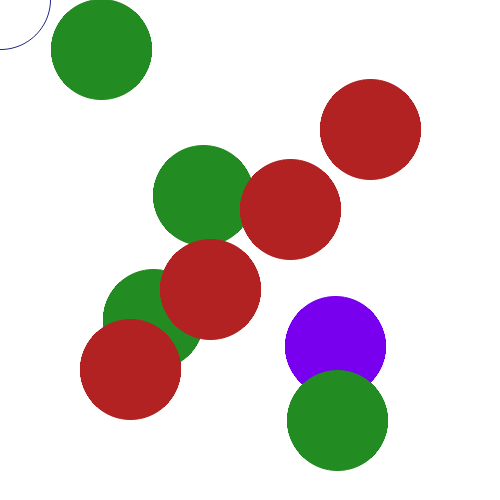

In [12]:
            
# The example of visualizing the saved test GIFs
from IPython.display import display, Image
if skip_training == False:
# Display the GIF in Jupyter
    display(Image(filename="imgs/difficult_env.gif"))  # Change the file path to display yours


## Task 1.3: Plot the algorithm's performance in each environment

If all above code runs successfully, now we want to make a plot of the algorithm's training performance. You can run the code below to make plots. The training performance will look similar to this:

<p align="center">
  <figure style="display: inline-block; text-align: center; margin: 10px;">
    <img src="imgs/ppo_statistical_SandingEnvEasy.png" alt="PPO Easy Environment" width="240"/>
    <figcaption>PPO Easy</figcaption>
  </figure>
  <figure style="display: inline-block; text-align: center; margin: 10px;">
    <img src="imgs/ppo_statistical_SandingEnvMiddle.png" alt="PPO Middle Environment" width="240"/>
    <figcaption>PPO Middle</figcaption>
  </figure>
  <!-- <figure style="display: inline-block; text-align: center; margin: 10px;">
    <img src="imgs/ppo_statistical_SandingEnvDifficult.png" alt="PPO Difficult Environment" width="240"/>
    <figcaption>PPO Difficult</figcaption>
  </figure> -->
</p>
<p align="center">
  <figure style="display: inline-block; text-align: center; margin: 10px;">
    <img src="imgs/ddpg_statistical_SandingEnvEasy.png" alt="DDPG Easy Environment" width="240"/>
    <figcaption>DDPG Easy</figcaption>
  </figure>
  <figure style="display: inline-block; text-align: center; margin: 10px;">
    <img src="imgs/ddpg_statistical_SandingEnvMiddle.png" alt="DDPG Middle Environment" width="240"/>
    <figcaption>DDPG Middle</figcaption>
  </figure>
  <!-- <figure style="display: inline-block; text-align: center; margin: 10px;">
    <img src="imgs/ddpg_statistical_SandingEnvDifficult.png" alt="DDPG Difficult Environment" width="240"/>
    <figcaption>DDPG Difficult</figcaption>
  </figure> -->
</p>

**Note**: You do not need to make the plots look exactly the same as shown above.  The following code generates 3 figures (1 algorithm x 3 environments). Please comment below the algorithm you did not implement.

### Paths:
Your plot should be plotted in the following paths if the code runs successfully:

- **PPO Easy**: 
  - `results/SandingEnvMiddle/ppo/logging/figure_statistical_SandingEnvEasy.pdf`
- **PPO Middle**: 
  - `results/SandingEnvMiddle/ppo/logging/figure_statistical_SandingEnvMiddle.pdf`
<!-- - **PPO Difficult**: 
  - `results/SandingEnvMiddle/PPO/logging/figure_statistical_SandingEnvDifficult.pdf` -->
 


 or
 
- **DDPG Easy**: 
  - `results/SandingEnvMiddle/ddpg/logging/figure_statistical_SandingEnvEasy.pdf`
- **DDPG Middle**: 
  - `results/SandingEnvMiddle/ddpg/logging/figure_statistical_SandingEnvMiddle.pdf`
<!-- - **DDPG Difficult**: 
  - `results/SandingEnvMiddle/DDPG/logging/figure_statistical_SandingEnvDifficult.pdf` -->


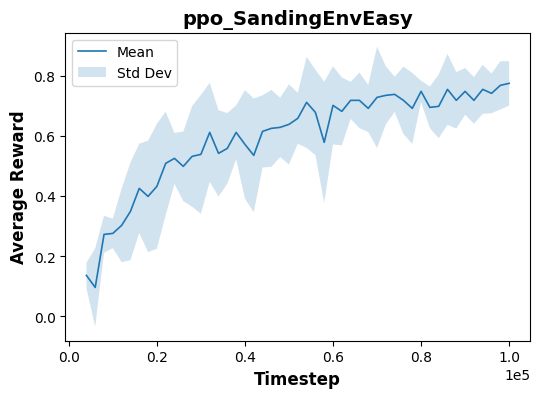

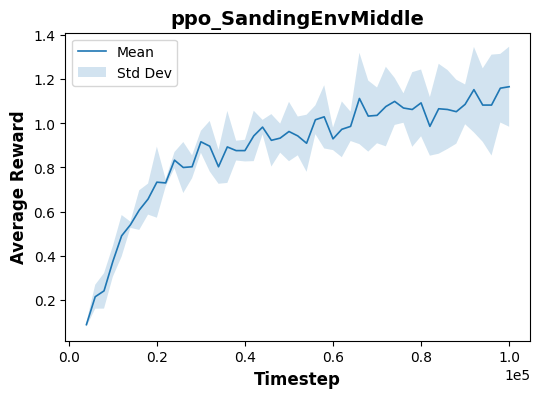

In [13]:
## Run the following code to plot PPO or DDPG's training performances
import warnings
warnings.filterwarnings('ignore')
if skip_training == False:
    # Uncomment the algorithm you chose 
    implemented_algo = algorithm_implemented # 'ppo' or 'ddpg'
    
    
    # Loop over the three difficulty levels
    for environment in ['easy', 'middle']:
    
        training_seeds = []
        for i in range(3):
            config=setup(algo=implemented_algo, env=environment)
    
            config["seed"] = i
            training_seeds.append(i)
    
    
            if config["args"].algo_name == 'ppo':
                agent=PPOAgent(config)
            elif config["args"].algo_name == 'ddpg':
                agent=DDPGAgent(config)
            else:
                raise Exception('Please use ppo or ddpg!')
    
        # plot the statistical training curves with specific random seeds
        cu.plot_algorithm_training(agent.logging_dir, training_seeds, agent.env_name, implemented_algo)
    

DOUBLE CLICK HERE TO EDIT, RUN the above code to make training plots for each algorithm

The following cells are used for testing.

In [14]:

# Function to test a trained policy
def grading_test(agent, env_name, algo_name):
    # Load model
    agent.load_model()
    returns = []
    rng = np.random.default_rng(42)
    
    for ep in range(agent.cfg.test_episodes):
        seed = rng.integers(low=1, high=1000)
        observation, _ = agent.env.reset(seed=int(seed))
        test_reward, test_len, done = 0, 0, False
        
            
        while not done and test_len < agent.cfg.max_episode_steps:
            action, _ = agent.get_action(observation, evaluation=True)
            observation, reward, done, truncated, info = agent.env.step(action.flatten())
            test_reward += reward
            test_len += 1
        returns.append(test_reward)
    return returns


Compares the performance of your algorithm with the baseline in order to check that there is no statistical significant difference.

In [15]:

warnings.filterwarnings('ignore')

environment = 'easy'

def test_task1_1():
    baseline_test_returns = []

    for i in range(3):
        config=setup(algo=algorithm_implemented, env=environment, render=False)
        config["seed"] = i
        if config["args"].algo_name == 'ppo':
            agent=PPOAgent(config)
        elif config["args"].algo_name == 'ddpg':
            agent=DDPGAgent(config)
        else:
            raise Exception('Please use ppo or ddpg!')

        baseline_test_returns.append(np.sum(grading_test(agent, environment, algorithm_implemented))/agent.cfg.test_episodes)

    if algorithm_implemented == 'ppo':
        ppo_easy_baseline_target = np.array([0.738, 0.79, 0.78, 0.8,  0.798, 0.774, 0.802, 0.754,  0.756,  0.554])
        better_performance = np.mean(baseline_test_returns) > np.mean(ppo_easy_baseline_target)
        assert not cu.test_significant_difference(ppo_easy_baseline_target, np.array(baseline_test_returns), 0.05) or better_performance
    elif algorithm_implemented == 'ddpg':
        ddpg_easy_baseline_target =  np.array([ 0.83, 0.792, 0.804,  0.654, 0.562, 0.8, 0.888, 0.714, 0.724, 0.774])
        better_performance = np.mean(baseline_test_returns) > np.mean(ddpg_easy_baseline_target)
        assert not cu.test_significant_difference(ddpg_easy_baseline_target, np.array(baseline_test_returns), 0.05) or better_performance


test_task1_1()

Loaded model from c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\model/model_parameters_0.pt
Loaded model from c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\model/model_parameters_1.pt
Loaded model from c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvEasy\ppo\model/model_parameters_2.pt




<a id='T2'></a>
<div class="alert alert-warning">
    <h3><b>Student Task 2</b> (40 points)</h3>
    Your objective in this task is to enhance the performance of the DDPG/PPO algorithms, taking inspiration from the suggestions provided in <b>Section 5.II</b>. 

    1. You must elevate the base algorithm's performance to ensure the agent's success in the moderate difficulty environment (environment = 'middle'). 
    
    2. Please document your results here, including the training plots and test performance.
    
    3. Adhere to the given structure to facilitate testing with 'setup' and 'test'  function.
    
    4. If you choose PPO, implement either Dual-Clip PPO or Self Imitation Learning (SIL).
    
    5. If you opt for DDPG, implement either LNSS DDPG or SIL.
    
    6. Carefully read the extension guidelines outlined in <b>Section 5.II</b>, and proceed to modify either 'ddpg_extension.py' or 'ppo_extension.py' located in the 'algos' folder. 
    
</div>



## Task 2.1: Enhance Your Chosen Algorithm

### a) Overview
Improve the performance of your selected reinforcement learning algorithm. Ensure that your implementations are properly documented and organized for clarity.

### b) Implementation Details
- **Algorithm Improvements**: Enhance your chosen algorithm.
  - If you choose PPO, implement either Dual-Clip PPO or Self Imitation Learning (SIL)
  -  If you opt for DDPG, implement either LNSS  or SIL.
  - Ensure that the performance is noticeably improved.
  - Place your implementations in the appropriate file:
    - 'algos/ddpg_extension.py' for DDPG
    - 'algos/ppo_extension.py' for PPO

### c) Training
- **Random Seeds**: Train your algorithm using three distinct random seeds [0,1,2] to ensure robustness and repeatability.

### d) Evaluation
- **Environment**: Evaluate your algorithm exclusively in the **middle-level difficulty environment** to focus your improvements.

### e) Code Compatibility
- Ensure that your code is **fully compatible** with all existing functions in other files, maintaining the integrity of the overall project structure.

---



**Train**: After implementing the improvement extensions, run the following code to train your agents.

In [16]:
# Implement your improved algorithm either in algos/ddpg_extension.py or algos/ppo_extension.py
# uncomment the following line to import the agent
%load_ext autoreload
%autoreload 2

# from algos.ddpg_extension import DDPGExtension
from algos.ppo_extension import PPOExtension

implemented_algo = 'ppo_extension' # choose 'ppo_extension' or 'ddpg_extension'
environment = 'middle'
if skip_training == False:
    training_seeds = []
    for i in range(3):
        config=setup(algo=implemented_algo, env=environment, render=True)
    
        config["seed"] = i
        training_seeds.append(i)
    
    
        if config["args"].algo_name == 'ppo_extension':
            agent=PPOExtension(config)
        elif config["args"].algo_name == 'ddpg_extension':
            agent=DDPGExtension(config)
        else:
            raise Exception('Please use ppo or ddpg!')
    
        # Train the agent using selected algorithm    
        agent.train()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
MoviePy - Building video c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo_extension\video\train\project-episode-0.mp4.
MoviePy - Writing video c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo_extension\video\train\project-episode-0.mp4



MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo_extension\video\train\project-episode-0.mp4
MoviePy - Building video c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo_extension\video\train\project-episode-0.mp4.
MoviePy - Writing video c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo_extension\video\train\project-episode-0.mp4



MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo_extension\video\train\project-episode-0.mp4
Episode 99 Step 2000: Avg return 0.44, Episode length 20, logstd tensor([0.6794, 0.6794])
Episode 199 Step 4000: Avg return 0.33, Episode length 20, logstd tensor([0.6656, 0.6656])
Episode 299 Step 6000: Avg return 0.35, Episode length 20, logstd tensor([0.6517, 0.6517])
Episode 399 Step 8000: Avg return 0.52, Episode length 20, logstd tensor([0.6378, 0.6378])
Episode 499 Step 10000: Avg return 0.51, Episode length 20, logstd tensor([0.6240, 0.6240])
Episode 599 Step 12000: Avg return 0.54, Episode length 20, logstd tensor([0.6101, 0.6101])
Episode 699 Step 14000: Avg return 0.54, Episode length 20, logstd tensor([0.5962, 0.5962])
Episode 799 Step 16000: Avg return 0.58, Episode length 20, logstd tensor([0.5824, 0.5824])
Episode 899 Step 18000: Avg return 0.59, Episode length 20, logstd tensor([0.5685, 0.568

MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo_extension\video\train\project-episode-1000.mp4
Episode 1099 Step 22000: Avg return 0.62, Episode length 20, logstd tensor([0.5408, 0.5408])
Episode 1199 Step 24000: Avg return 0.55, Episode length 20, logstd tensor([0.5269, 0.5269])
Episode 1299 Step 26000: Avg return 0.55, Episode length 20, logstd tensor([0.5131, 0.5131])
Episode 1399 Step 28000: Avg return 0.49, Episode length 20, logstd tensor([0.4992, 0.4992])
Episode 1499 Step 30000: Avg return 0.65, Episode length 20, logstd tensor([0.4853, 0.4853])
Episode 1599 Step 32000: Avg return 0.74, Episode length 20, logstd tensor([0.4715, 0.4715])
Episode 1699 Step 34000: Avg return 0.53, Episode length 20, logstd tensor([0.4576, 0.4576])
Episode 1799 Step 36000: Avg return 0.71, Episode length 20, logstd tensor([0.4438, 0.4438])
Episode 1899 Step 38000: Avg return 0.56, Episode length 20, logstd tens

MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo_extension\video\train\project-episode-2000.mp4
Episode 2099 Step 42000: Avg return 0.71, Episode length 20, logstd tensor([0.4022, 0.4022])
Episode 2199 Step 44000: Avg return 0.65, Episode length 20, logstd tensor([0.3883, 0.3883])
Episode 2299 Step 46000: Avg return 0.69, Episode length 20, logstd tensor([0.3744, 0.3744])
Episode 2399 Step 48000: Avg return 0.56, Episode length 20, logstd tensor([0.3606, 0.3606])
Episode 2499 Step 50000: Avg return 0.64, Episode length 20, logstd tensor([0.3467, 0.3467])
Episode 2599 Step 52000: Avg return 0.73, Episode length 20, logstd tensor([0.3328, 0.3328])
Episode 2699 Step 54000: Avg return 0.73, Episode length 20, logstd tensor([0.3190, 0.3190])
Episode 2799 Step 56000: Avg return 0.75, Episode length 20, logstd tensor([0.3051, 0.3051])
Episode 2899 Step 58000: Avg return 0.84, Episode length 20, logstd tens

MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo_extension\video\train\project-episode-3000.mp4
Episode 3099 Step 62000: Avg return 0.64, Episode length 20, logstd tensor([0.2635, 0.2635])
Episode 3199 Step 64000: Avg return 0.67, Episode length 20, logstd tensor([0.2497, 0.2497])
Episode 3299 Step 66000: Avg return 0.76, Episode length 20, logstd tensor([0.2358, 0.2358])
Episode 3399 Step 68000: Avg return 0.73, Episode length 20, logstd tensor([0.2219, 0.2219])
Episode 3499 Step 70000: Avg return 0.78, Episode length 20, logstd tensor([0.2081, 0.2081])
Episode 3599 Step 72000: Avg return 0.77, Episode length 20, logstd tensor([0.1942, 0.1942])
Episode 3699 Step 74000: Avg return 0.69, Episode length 20, logstd tensor([0.1804, 0.1804])
Episode 3799 Step 76000: Avg return 0.77, Episode length 20, logstd tensor([0.1665, 0.1665])
Episode 3899 Step 78000: Avg return 0.84, Episode length 20, logstd tens

MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo_extension\video\train\project-episode-4000.mp4
Episode 4099 Step 82000: Avg return 0.76, Episode length 20, logstd tensor([0.1249, 0.1249])
Episode 4199 Step 84000: Avg return 0.73, Episode length 20, logstd tensor([0.1110, 0.1110])
Episode 4299 Step 86000: Avg return 0.88, Episode length 20, logstd tensor([0.0972, 0.0972])
Episode 4399 Step 88000: Avg return 0.79, Episode length 20, logstd tensor([0.0833, 0.0833])
Episode 4499 Step 90000: Avg return 0.73, Episode length 20, logstd tensor([0.0695, 0.0695])
Episode 4599 Step 92000: Avg return 0.70, Episode length 20, logstd tensor([0.0556, 0.0556])
Episode 4699 Step 94000: Avg return 0.76, Episode length 20, logstd tensor([0.0417, 0.0417])
Episode 4799 Step 96000: Avg return 0.82, Episode length 20, logstd tensor([0.0279, 0.0279])
Episode 4899 Step 98000: Avg return 0.81, Episode length 20, logstd tens

MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo_extension\video\train\project-episode-5000.mp4
Saved model to c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo_extension\model/model_parameters_0.pt
logger and seed 0
c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo_extension\logging/logs_0.csv
------ Training finished ------
Total training time: 8.65 mins
MoviePy - Building video c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo_extension\video\train\project-episode-0.mp4.
MoviePy - Writing video c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo_extension\video\train\project-episode-0.mp4



MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo_extension\video\train\project-episode-0.mp4


MoviePy - Building video c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo_extension\video\train\project-episode-0.mp4.
MoviePy - Writing video c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo_extension\video\train\project-episode-0.mp4



MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo_extension\video\train\project-episode-0.mp4
Episode 99 Step 2000: Avg return 0.11, Episode length 20, logstd tensor([0.6794, 0.6794])
Episode 199 Step 4000: Avg return 0.22, Episode length 20, logstd tensor([0.6656, 0.6656])
Episode 299 Step 6000: Avg return 0.26, Episode length 20, logstd tensor([0.6517, 0.6517])
Episode 399 Step 8000: Avg return 0.41, Episode length 20, logstd tensor([0.6378, 0.6378])
Episode 499 Step 10000: Avg return 0.56, Episode length 20, logstd tensor([0.6240, 0.6240])
Episode 599 Step 12000: Avg return 0.42, Episode length 20, logstd tensor([0.6101, 0.6101])
Episode 699 Step 14000: Avg return 0.42, Episode length 20, logstd tensor([0.5962, 0.5962])
Episode 799 Step 16000: Avg return 0.51, Episode length 20, logstd tensor([0.5824, 0.5824])
Episode 899 Step 18000: Avg return 0.40, Episode length 20, logstd tensor([0.5685, 0.568

MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo_extension\video\train\project-episode-1000.mp4
Episode 1099 Step 22000: Avg return 0.35, Episode length 20, logstd tensor([0.5408, 0.5408])
Episode 1199 Step 24000: Avg return 0.43, Episode length 20, logstd tensor([0.5269, 0.5269])
Episode 1299 Step 26000: Avg return 0.47, Episode length 20, logstd tensor([0.5131, 0.5131])
Episode 1399 Step 28000: Avg return 0.38, Episode length 20, logstd tensor([0.4992, 0.4992])
Episode 1499 Step 30000: Avg return 0.51, Episode length 20, logstd tensor([0.4853, 0.4853])
Episode 1599 Step 32000: Avg return 0.52, Episode length 20, logstd tensor([0.4715, 0.4715])
Episode 1699 Step 34000: Avg return 0.57, Episode length 20, logstd tensor([0.4576, 0.4576])
Episode 1799 Step 36000: Avg return 0.67, Episode length 20, logstd tensor([0.4438, 0.4438])
Episode 1899 Step 38000: Avg return 0.77, Episode length 20, logstd tens

MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo_extension\video\train\project-episode-2000.mp4
Episode 2099 Step 42000: Avg return 0.41, Episode length 20, logstd tensor([0.4022, 0.4022])
Episode 2199 Step 44000: Avg return 0.67, Episode length 20, logstd tensor([0.3883, 0.3883])
Episode 2299 Step 46000: Avg return 0.62, Episode length 20, logstd tensor([0.3744, 0.3744])
Episode 2399 Step 48000: Avg return 0.58, Episode length 20, logstd tensor([0.3606, 0.3606])
Episode 2499 Step 50000: Avg return 0.60, Episode length 20, logstd tensor([0.3467, 0.3467])
Episode 2599 Step 52000: Avg return 0.65, Episode length 20, logstd tensor([0.3328, 0.3328])
Episode 2699 Step 54000: Avg return 0.61, Episode length 20, logstd tensor([0.3190, 0.3190])
Episode 2799 Step 56000: Avg return 0.76, Episode length 20, logstd tensor([0.3051, 0.3051])
Episode 2899 Step 58000: Avg return 0.67, Episode length 20, logstd tens

MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo_extension\video\train\project-episode-3000.mp4
Episode 3099 Step 62000: Avg return 0.80, Episode length 20, logstd tensor([0.2635, 0.2635])
Episode 3199 Step 64000: Avg return 0.82, Episode length 20, logstd tensor([0.2497, 0.2497])
Episode 3299 Step 66000: Avg return 0.58, Episode length 20, logstd tensor([0.2358, 0.2358])
Episode 3399 Step 68000: Avg return 0.79, Episode length 20, logstd tensor([0.2219, 0.2219])
Episode 3499 Step 70000: Avg return 0.62, Episode length 20, logstd tensor([0.2081, 0.2081])
Episode 3599 Step 72000: Avg return 0.70, Episode length 20, logstd tensor([0.1942, 0.1942])
Episode 3699 Step 74000: Avg return 0.75, Episode length 20, logstd tensor([0.1804, 0.1804])
Episode 3799 Step 76000: Avg return 0.74, Episode length 20, logstd tensor([0.1665, 0.1665])
Episode 3899 Step 78000: Avg return 0.65, Episode length 20, logstd tens

MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo_extension\video\train\project-episode-4000.mp4
Episode 4099 Step 82000: Avg return 0.71, Episode length 20, logstd tensor([0.1249, 0.1249])
Episode 4199 Step 84000: Avg return 0.64, Episode length 20, logstd tensor([0.1110, 0.1110])
Episode 4299 Step 86000: Avg return 0.69, Episode length 20, logstd tensor([0.0972, 0.0972])
Episode 4399 Step 88000: Avg return 0.75, Episode length 20, logstd tensor([0.0833, 0.0833])
Episode 4499 Step 90000: Avg return 0.76, Episode length 20, logstd tensor([0.0695, 0.0695])
Episode 4599 Step 92000: Avg return 0.62, Episode length 20, logstd tensor([0.0556, 0.0556])
Episode 4699 Step 94000: Avg return 0.57, Episode length 20, logstd tensor([0.0417, 0.0417])
Episode 4799 Step 96000: Avg return 0.76, Episode length 20, logstd tensor([0.0279, 0.0279])
Episode 4899 Step 98000: Avg return 0.78, Episode length 20, logstd tens

MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo_extension\video\train\project-episode-5000.mp4
Saved model to c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo_extension\model/model_parameters_1.pt
logger and seed 1
c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo_extension\logging/logs_1.csv
------ Training finished ------
Total training time: 8.84 mins
MoviePy - Building video c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo_extension\video\train\project-episode-0.mp4.
MoviePy - Writing video c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo_extension\video\train\project-episode-0.mp4



MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo_extension\video\train\project-episode-0.mp4


MoviePy - Building video c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo_extension\video\train\project-episode-0.mp4.
MoviePy - Writing video c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo_extension\video\train\project-episode-0.mp4



MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo_extension\video\train\project-episode-0.mp4
Episode 99 Step 2000: Avg return 0.57, Episode length 20, logstd tensor([0.6794, 0.6794])
Episode 199 Step 4000: Avg return 0.56, Episode length 20, logstd tensor([0.6656, 0.6656])
Episode 299 Step 6000: Avg return 0.72, Episode length 20, logstd tensor([0.6517, 0.6517])
Episode 399 Step 8000: Avg return 0.65, Episode length 20, logstd tensor([0.6378, 0.6378])
Episode 499 Step 10000: Avg return 0.61, Episode length 20, logstd tensor([0.6240, 0.6240])
Episode 599 Step 12000: Avg return 0.70, Episode length 20, logstd tensor([0.6101, 0.6101])
Episode 699 Step 14000: Avg return 0.54, Episode length 20, logstd tensor([0.5962, 0.5962])
Episode 799 Step 16000: Avg return 0.66, Episode length 20, logstd tensor([0.5824, 0.5824])
Episode 899 Step 18000: Avg return 0.64, Episode length 20, logstd tensor([0.5685, 0.568

MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo_extension\video\train\project-episode-1000.mp4
Episode 1099 Step 22000: Avg return 0.69, Episode length 20, logstd tensor([0.5408, 0.5408])
Episode 1199 Step 24000: Avg return 0.71, Episode length 20, logstd tensor([0.5269, 0.5269])
Episode 1299 Step 26000: Avg return 0.59, Episode length 20, logstd tensor([0.5131, 0.5131])
Episode 1399 Step 28000: Avg return 0.58, Episode length 20, logstd tensor([0.4992, 0.4992])
Episode 1499 Step 30000: Avg return 0.71, Episode length 20, logstd tensor([0.4853, 0.4853])
Episode 1599 Step 32000: Avg return 0.69, Episode length 20, logstd tensor([0.4715, 0.4715])
Episode 1699 Step 34000: Avg return 0.64, Episode length 20, logstd tensor([0.4576, 0.4576])
Episode 1799 Step 36000: Avg return 0.51, Episode length 20, logstd tensor([0.4438, 0.4438])
Episode 1899 Step 38000: Avg return 0.75, Episode length 20, logstd tens

MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo_extension\video\train\project-episode-2000.mp4
Episode 2099 Step 42000: Avg return 0.73, Episode length 20, logstd tensor([0.4022, 0.4022])
Episode 2199 Step 44000: Avg return 0.68, Episode length 20, logstd tensor([0.3883, 0.3883])
Episode 2299 Step 46000: Avg return 0.56, Episode length 20, logstd tensor([0.3744, 0.3744])
Episode 2399 Step 48000: Avg return 0.62, Episode length 20, logstd tensor([0.3606, 0.3606])
Episode 2499 Step 50000: Avg return 0.56, Episode length 20, logstd tensor([0.3467, 0.3467])
Episode 2599 Step 52000: Avg return 0.75, Episode length 20, logstd tensor([0.3328, 0.3328])
Episode 2699 Step 54000: Avg return 0.59, Episode length 20, logstd tensor([0.3190, 0.3190])
Episode 2799 Step 56000: Avg return 0.70, Episode length 20, logstd tensor([0.3051, 0.3051])
Episode 2899 Step 58000: Avg return 0.56, Episode length 20, logstd tens

MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo_extension\video\train\project-episode-3000.mp4
Episode 3099 Step 62000: Avg return 0.76, Episode length 20, logstd tensor([0.2635, 0.2635])
Episode 3199 Step 64000: Avg return 0.77, Episode length 20, logstd tensor([0.2497, 0.2497])
Episode 3299 Step 66000: Avg return 0.62, Episode length 20, logstd tensor([0.2358, 0.2358])
Episode 3399 Step 68000: Avg return 0.75, Episode length 20, logstd tensor([0.2219, 0.2219])
Episode 3499 Step 70000: Avg return 0.71, Episode length 20, logstd tensor([0.2081, 0.2081])
Episode 3599 Step 72000: Avg return 0.65, Episode length 20, logstd tensor([0.1942, 0.1942])
Episode 3699 Step 74000: Avg return 0.67, Episode length 20, logstd tensor([0.1804, 0.1804])
Episode 3799 Step 76000: Avg return 0.68, Episode length 20, logstd tensor([0.1665, 0.1665])
Episode 3899 Step 78000: Avg return 0.80, Episode length 20, logstd tens

MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo_extension\video\train\project-episode-4000.mp4
Episode 4099 Step 82000: Avg return 0.74, Episode length 20, logstd tensor([0.1249, 0.1249])
Episode 4199 Step 84000: Avg return 0.86, Episode length 20, logstd tensor([0.1110, 0.1110])
Episode 4299 Step 86000: Avg return 0.73, Episode length 20, logstd tensor([0.0972, 0.0972])
Episode 4399 Step 88000: Avg return 0.78, Episode length 20, logstd tensor([0.0833, 0.0833])
Episode 4499 Step 90000: Avg return 0.81, Episode length 20, logstd tensor([0.0695, 0.0695])
Episode 4599 Step 92000: Avg return 0.81, Episode length 20, logstd tensor([0.0556, 0.0556])
Episode 4699 Step 94000: Avg return 0.84, Episode length 20, logstd tensor([0.0417, 0.0417])
Episode 4799 Step 96000: Avg return 0.87, Episode length 20, logstd tensor([0.0279, 0.0279])
Episode 4899 Step 98000: Avg return 0.74, Episode length 20, logstd tens

MoviePy - Done !
MoviePy - video ready c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo_extension\video\train\project-episode-5000.mp4
Saved model to c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo_extension\model/model_parameters_2.pt
logger and seed 2
c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo_extension\logging/logs_2.csv
------ Training finished ------
Total training time: 8.74 mins


**Test**: After training, run the following code to test your agents.

In [17]:
if skip_training == False:
    training_seeds = []
    for i in range(3):
        config=setup(algo=implemented_algo, env=environment)
    
        config["seed"] = i
        training_seeds.append(i)
    
    
        if config["args"].algo_name == 'ppo_extension':
            agent=PPOExtension(config)
        elif config["args"].algo_name == 'ddpg_extension':
            agent=DDPGExtension(config)
        else:
            raise Exception('Please use ppo or ddpg!')
    
        # Test the agent in the selected environment
        test(agent, environment, implemented_algo)
    

Loaded model from c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo_extension\model/model_parameters_0.pt
Testing...
Saved GIF to c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo_extension\video\test\_seed_0_ep_0.gif
Saved GIF to c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo_extension\video\test\_seed_0_ep_100.gif
Saved GIF to c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo_extension\video\test\_seed_0_ep_200.gif
Saved GIF to c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo_extension\video\test\_seed_0_ep_300.gif
Saved GIF to c:\Users\arnau\Uni\Master\2A_Aalto\RL\reinforcement-learning\project\results\SandingEnvMiddle\ppo_extension\video\test\_seed_0_ep_400.gif
Average test reward over 500 episodes: 0.714,+- 0.6482314401508152;         Averag

## Task 2.2: Plot improved algorithm performance 

### a) Display the plots:
Display the training performance of your improved algorithm, similarly as in task 1.3

### b) Paths:
Your plot should be plotted in the following paths if the code runs successfully:

- **improved Middle**: 
  - `results/SandingEnvMiddle/ppo_extension(or ddpg_extension)/logging/figure_statistical_SandingEnvMiddle.pdf`



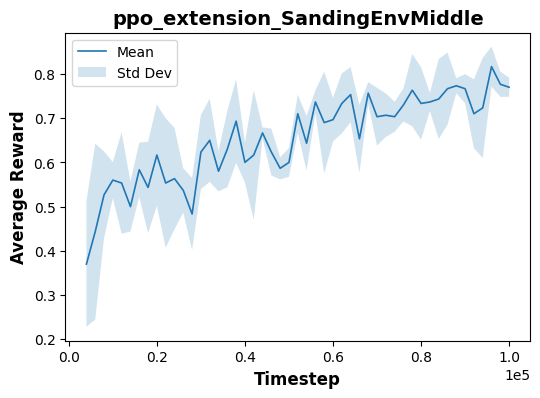

In [18]:
## Run the following code to plot PPO or DDPG's training performances
import warnings
warnings.filterwarnings('ignore')

if skip_training == False:

    # Uncomment the algorithm you chose
    implemented_algo = 'ppo_extension'  # 'ppo_extension' or 'ddpg_extension'
    environment = 'middle'
    
    # Loop over the three difficulty levels
    
    training_seeds = [0,1,2]
    
    config=setup(algo=implemented_algo, env=environment)
    
    config["seed"] = 0
    
    agent= PPOExtension(config) # DDPGExtension(config) or PPOExtension(config)
    
    # plot the statistical training curves with specific random seeds
    cu.plot_algorithm_training(agent.logging_dir, training_seeds, agent.env_name, implemented_algo)


## Task 2.3: Comparison of Improved and Original Algorithm Performance

### a) Display the Plots
Display the training performance of both the improved and the original algorithms.

We aim to compare the training performances of the original and improved algorithms. To achieve this, we will generate the following plots, which will highlight the sample efficiency and the agent's performance throughout the training process. Below are some figures comparing the performances of DDPG and PPO:

<p align="center">
  <figure style="display: inline-block; text-align: center; margin: 10px;">
    <img src="imgs/middle_compare_ddpg_ppo.png" alt="PPO Middle Environment" width="540"/>
    <figcaption>PPO vs DDPG (Middle environment)</figcaption>
  </figure>
  
</p>

**Note**: The display does not need to exactly match the figures shown above. However, the code should generate a figure to compare the original algorithm with the improved algorithm.

### b) Paths
If the code runs successfully, your plot should be saved to the following paths:

- **Original vs Improved (Middle Environment)**: 
  - `results/SandingEnvMiddle/compare_ddpg_ddpg_extension.pdf`
  - or 
  - `results/SandingEnvMiddle/compare_ppo_ppo_extension.pdf`


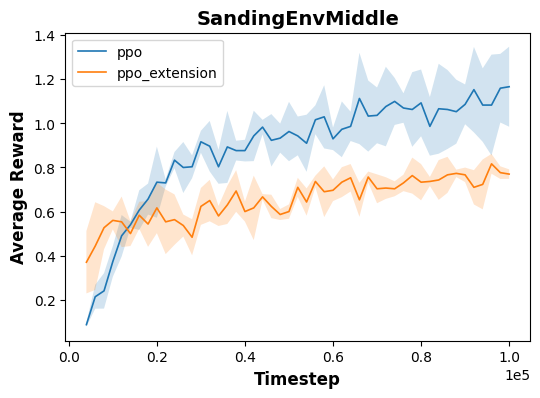

In [21]:
## Run the following code to draw the comparison plots of PPO and DDPG's training performances
import warnings
warnings.filterwarnings('ignore')

environment = 'middle'

if skip_training == False:
    orgin_alo_name = 'ppo'# 'ddpg' or 'ppo'
    improved_alo_name = 'ppo_extension' # 'ddpg_extension' or 'ppo_extension'
    
    config=setup(algo=orgin_alo_name, env=environment)
    origin_agent = PPOAgent(config) # DDPGAgent(config) or PPOAgent(config)
    
    config=setup(algo=improved_alo_name, env=environment)
    improved_agent = PPOExtension(config) # DDPGExtension(config) or PPOExtension(config)
    
    # make the comparison plot
    cu.compare_algorithm_training(origin_agent, improved_agent, seeds=[0,1,2])

The following cells are used for grading

In [22]:
%%capture --no-stdout
"TEST"

In [23]:
%%capture --no-stdout
"TEST"

In [24]:
%%capture --no-stdout
"TEST"

In [25]:
%%capture --no-stdout
"TEST"

<a id='Q1'></a>
<div class="alert alert-warning">
    <h3><b>Student Question 1</b> (30 points)</h3> 
    
    1. Answer the questions regarding how you extended PPO/DDPG. ONLY choose the question group related to your extension.
    
    2. Each question will tell you the maximum number of answers you can select, however the number of correct answers can be lower.
    
    3. Please do not select more answers than the maximum number as that will reduce your points to zero.
    
    4. You get full points for selecting the correct answers in every question.
    
    5. You get partial points if you select a mix of correct and wrong answers.
    
    6. Make sure to submit your answers.
    
    7. For LNSS questions you may seek help from https://openreview.net/forum?id=EGfYnTyEGv
    
</div>


In [ ]:
from IPython.display import display, Markdown
import ipywidgets as widgets
import pickle


# Define the questions for each topic with the exact content you provided
ppo_questions = [
    {
        'question_id': 'PPO_Q1',
        'question': 'What problem does Dual-Clip PPO aim to address? (Select a maximum of 3 options)',
        'options': {
            'A': 'Reducing computational complexity',
            'B': 'Managing large policy deviations',
            'C': 'Enhancing exploration',
            'D': 'Bounding the objective when advantage is less than zero'
        },
    },
    {
        'question_id': 'PPO_Q2',
        'question': 'How does Dual-Clip PPO differ from standard PPO in its clipping strategy? (Select a maximum of 3 options)',
        'options': {
            'A': 'It uses a single clipping parameter',
            'B': 'It introduces a second clipping for negative advantages',
            'C': 'The range of ratio in PPO is $(1- \\epsilon, \\infty)$, while in Dual-PPO is $(1- \\epsilon, c)$ when advantage is less than zero',
            'D': 'It clips both state and action spaces'
        },
    }
]

sil_questions = [
    {
        'question_id': 'SIL_Q1',
        'question': 'Which of the following describes how SIL selects experiences for learning? (Select a maximum of 3 options)',
        'options': {
            'A': 'SIL uses experiences that maximize the entropy of the policy.',
            'B': 'SIL uses experiences where the past returns exceed the agent\'s current value estimate.',
            'C': 'SIL prioritizes experiences based on clipped advantage.',
            'D': 'SIL selects random experiences from the replay buffer.'
        },
    },
    {
        'question_id': 'SIL_Q2',
        'question': 'What are the potential downsides of using SIL? (Select a maximum of 3 options)',
        'options': {
            'A': 'It may lead to overfitting on suboptimal past experiences.',
            'B': 'It can significantly increase the computational load.',
            'C': 'It requires a large amount of expert data to start learning.',
            'D': 'Some off-policy methods may not benefit much from SIL.'
        },
    }
]

ddpg_lnss_questions = [
    {
        'question_id': 'DDPG_Q1',
        'question': 'What are the correct descriptions of LNSS: (Select a maximum of 5 options)',
        'options': {
            'A': 'The surrogate reward actually is a weighted average of discounted N-step return;',
            'B': (
                'Given following equations\n'
                '$$G_k = \\sum_{t=k}^{k+N-1} \\gamma^{t-k} r_t$$,\n'
                '$$ r\'_k = \\frac{\\sum_{t=k}^{k+N-1} \\gamma^{t-k} r_t}{\\sum_{n=0}^{N-1} \\gamma^n}$$,\n'
                '$$ r\'_k = \\frac{\\gamma - 1}{\\gamma^N - 1} \\sum_{t=k}^{k+N-1} \\gamma^{t-k} r_t.$$ \n'
                'These three equations describe different accumulated reward for making a surrogate reward.'
            ),
            'C': 'LNSS can reduce the estimated Q-value variance ;',
            'D': 'Use a larger $N$ hyperparameter for calculating the surrogate reward can help reduce the upper bound of estimated Q-value variance ;',
            'E': (
                'Given the surrogate reward $r\'_t$ defined in Eq.7, the accumulated reward $G\'_k = \\sum_{t=k}^{k+N-1} \\gamma^{t-k} r\'_t$, upon learning convergence, '
                '$G\'_k$ is a biased estimate of $G_k$ in Eq.4'
            ),
            'F': (
                'If we assume that the given policy $\\pi$ results in the same expectation of stage reward, i.e., $\\mathbb{E}^{\\pi}[r_k] = \\mathbb{E}^{\\pi}[r\'_k]$ for all $k$. '
                'then the $Q^{\\pi}$ of using the original reward and $Q^{\\pi}$ of using LNSS are the same. '
            ),
            'G': (
                'If $\\pi$ refers to policy $\\pi_j$ for $j \\to \\infty$ (meaning that episode horizon is infinite). In this case, we can consider '
                '$Q^{\\pi} = Q^{\\pi_{\\infty}}, \\mathbf{Q}^{\\bar{\\pi}} = \\mathbf{Q}^{\\bar{\\pi}_{\\infty}}$ but  $Q^{\\pi_{\\infty}} \\neq \\mathbf{Q}^{\\bar{\\pi}_{\\infty}}$.\n'
                'This is because using different rewards, the target policy will be different during policy improvement so that it results in different $Q$ values.'
            ),
            
            
        },
    },
    {
        'question_id': 'DDPG_Q2',
        'question': '“n-step” RL and LNSS: (Select a maximum of 4 options)',
        'options': {
            'A': (
                'LNSS can have unbiased estimation of Q-value, but “n-step” RL like n-step DDPG or n-step D4PG with deterministic policy may not. '
            ),
            'B': (
                'Off-policy n-step methods such as TD($\\lambda$) and Q($\\sigma$) are shown to decrease the estimation bias also increases the variance. '
                'As LNSS aims to, and is shown to, reduce variance without sacrificing bias.'
            ),
            'C': 'Importance sampling is required when applying n-step bootstrapping to calculate the TD target when the policy is non-deterministic   ',
            'D': 'If we use LNSS, we should better not to use “n-step” RL ',
            'E': (
                'LNSS theoretically reduces the upper bound of variance according to Theorem 1. Furthermore, this bound linearly decreases as N increases.  '
            ),
            'F': 'Using the LNSS surrogate reward $r’_k$ may introduce additional estimation bias ',
            'G': (
                'Off-policy n-step methods such as TD($\\lambda$) and Q($\\sigma$) are shown to increase the estimation bias also increases the variance. '
                'As LNSS aims to, and is shown to, reduce variance without sacrificing bias. '
            ),
            'H': 'LNSS is more like automatically design a dense reward but it is not for “n-step” RL.',

            'I': '''For classical Q learning, we can directly use this equation to calculate the n-step TD target to update the Q function
$$
\\sum_{t=k}^{k+n-1} \\gamma^{t-k} r_t + \\gamma^n Q^{\\pi}(s_{k+n}, a_{k+n})
$$.
'''
        },
    },
    {
        'question_id': 'DDPG_Q3',
        'question': 'What are the correct descriptions of LNSS implementations: (Select a maximum of 3 options)',
        'options': {
            'A': 'We can randomly define N as we want as long as $N \\leq T$ where $T$ is the task horizon.',
            'B': (
                'Because LNSS needs to maintain another additional buffer to store the reward, so it doubles the memory for saving data during training. '
            ),
            'C': (
                'In some cases, LNSS will not relabel each interaction by recalculate and relabel reward of the transition tuple $(s, a, r, s’)$  ->  $(s, a, r_{LNSS}, s’)$.\n'
                'For example,  $k+N-1$ exceed the episode horizon then we will not recalculate the reward.'
            ),
            'D': (
                'If $k + N - 1 \\geq T$, which signifies a sufficient number of experience samples to compute LNSS surrogate reward $r\'$ with full $N$ steps, then\n'
                '$$ r\' = \\left( \\sum_{t=k}^{k+N-1} \\gamma^{t-k} r_t \\right) * \\frac{\\gamma - 1}{\\gamma^N - 1}. $$  '
            ),
            'E': 'Compared with classical off-policy RLs (DDPG, TD3, SAC, etc, ...) replay buffer, LNSS needs to maintain another additional buffer to store experience.',
            'F': (
                'In LNSS, we should not only store the re-calculated dense reward, but also need to keep the original reward in experience replay buffer.'
            )
        },
    }
]

# Function to create question widgets with left-aligned options
def create_question_widget(question_data):
    question_id = question_data['question_id']
    question_text = question_data['question']
    options = question_data['options']
    
    # Display the question
    display(Markdown(f"**{question_id}. {question_text}**"))
    
    # Create checkboxes for options
    option_widgets = []
    for key, value in options.items():
        if value.strip() == '':
            continue  # Skip empty options
        cb = widgets.Checkbox(value=False, layout=widgets.Layout(width='auto'))
        # Use HTMLMath widget to display LaTeX equations
        label_html = widgets.HTMLMath(value=f"<b>{key})</b> {value}", layout=widgets.Layout(width='auto'))
        # Combine checkbox and label, align items to the start (left)
        hb = widgets.HBox([cb, label_html], layout=widgets.Layout(align_items='flex-start'))
        option_widgets.append({'option_letter': key, 'checkbox': cb, 'widget': hb})
    
    # Arrange options vertically, align items to the start (left)
    options_box = widgets.VBox([item['widget'] for item in option_widgets], layout=widgets.Layout(align_items='flex-start'))
    display(options_box)
    
    # Return the list of option widgets so we can retrieve the values later
    return {'question_id': question_id, 'option_widgets': option_widgets}

# Create topic selector
topic_selector = widgets.SelectMultiple(
    options=['PPO', 'SIL', 'DDPG LNSS'],
    description='Select Topic(s):',
    disabled=False
)

proceed_button = widgets.Button(description="Proceed")
display(topic_selector, proceed_button)

display_area = widgets.Output()
display(display_area)

# Global variable to store all question widgets
all_question_widgets = []

# Function to handle proceed button click
def on_proceed_button_clicked(b):
    # Clear previous output
    display_area.clear_output()
    selected_topics = topic_selector.value
    # Clear previous question widgets
    global all_question_widgets
    all_question_widgets = []
    with display_area:
        for topic in selected_topics:
            if topic == 'PPO':
                for question_data in ppo_questions:
                    question_widget = create_question_widget(question_data)
                    all_question_widgets.append(question_widget)
            elif topic == 'SIL':
                for question_data in sil_questions:
                    question_widget = create_question_widget(question_data)
                    all_question_widgets.append(question_widget)
            elif topic == 'DDPG LNSS':
                for question_data in ddpg_lnss_questions:
                    question_widget = create_question_widget(question_data)
                    all_question_widgets.append(question_widget)
        # Display the submit button
        display(submit_button, output)

proceed_button.on_click(on_proceed_button_clicked)

# Create submit button and output area
submit_button = widgets.Button(description="Submit")
output = widgets.Output()
submission = {}
# Function to handle submit button click
def on_submit_button_clicked(b):
    with output:
        # Clear previous output
        output.clear_output()
        # Collect the answers
        print("Your submission:")
        
        # Create a mapping from question_id to topic
        question_id_to_topic = {}
        # Build the mapping
        for topic in ['PPO', 'SIL', 'DDPG LNSS']:
            if topic == 'PPO':
                questions = ppo_questions
            elif topic == 'SIL':
                questions = sil_questions
            elif topic == 'DDPG LNSS':
                questions = ddpg_lnss_questions
            for question_data in questions:
                question_id = question_data['question_id']
                question_id_to_topic[question_id] = topic
        
        # Prepare the submission variable
        global submission  # Declare submission as global to modify it inside the function
        submission = {}
        # Now process the submissions
        for question in all_question_widgets:
            question_id = question['question_id']
            option_widgets = question['option_widgets']
            selected_options = []
            for item in option_widgets:
                if item['checkbox'].value:
                    selected_options.append(item['option_letter'])
            # Get the topic from the mapping
            question_topic = question_id_to_topic.get(question_id, 'Unknown Topic')
            # Store the submission data
            
            submission[question_id] = {
                'selected_options': selected_options
            }
            # Print the submission for each question including the topic
            print(f"{question_topic} - {question_id}: {''.join(selected_options)}")
        
        # After processing all submissions, print the submission variable
        print("\nSubmission variable contents:")
        print(submission)
        with open('results/answers.pkl', 'wb') as f:
            pickle.dump(submission, f)


# Assign the event handler to the submit button
submit_button.on_click(on_submit_button_clicked)


SelectMultiple(description='Select Topic(s):', options=('PPO', 'SIL', 'DDPG LNSS'), value=())

Button(description='Proceed', style=ButtonStyle())

Output()

The following cells are used for grading, please do not remove them.

<a id='T3'></a>
<div class=" alert alert-warning">
    <h3><b>Student Task 3</b> (+20 points) </h3>
    This task gives bonus points to the project works that get highest performance. 
    
    1. Your projects shall be evaluated based on their performance in the difficult environment.
    
    2. Among all submissions, the best performing project (100% ranked) will receive 20 bonus points, 95% ranked or above will get 10 bonus points. (+20 points) 
    
    3. Run the cell below to do the evaluation, make sure all the generated files are included when you submit your work.
</div>

## Task 3.1: Evaluate Your Improved Algorithm with difficult environment


### a) Training
- **Random Seeds**: Train your algorithm using three distinct random seeds [0,1,2] to ensure robustness and repeatability.

### b) Evaluation
- **Environment**: Evaluate your algorithm exclusively in the **difficult-level difficulty environment** to focus your improvements.

### c) Code Compatibility
- Ensure that your code is **fully compatible** with all existing functions in other files, maintaining the integrity of the overall project structure.

---



In [ ]:

from algos.ddpg_agent import DDPGAgent
from algos.ppo_agent import PPOAgent
from algos.ddpg_extension import DDPGExtension
from algos.ppo_extension import PPOExtension
# implement your improved algorithm either in algos/ddpg_extension.py or algos/ppo_extension.py

implemented_algo = ''# choose 'ppo_extension' or 'ddpg_extension'
environment = 'difficult'


training_seeds = []
for i in range(3):
    config=setup(algo=implemented_algo, env=environment)

    config["seed"] = i
    training_seeds.append(i)


    if config["args"].algo_name == 'ppo':
        agent=PPOAgent(config)
    elif config["args"].algo_name == 'ddpg':
        agent=DDPGAgent(config)
    elif config["args"].algo_name == 'ppo_extension':
        agent=PPOExtension(config)
    elif config["args"].algo_name == 'ddpg_extension':
        agent=DDPGExtension(config)
    else:
        raise Exception('Please use ppo or ddpg!')

    # Train the agent using selected algorithm    
    agent.train()

  

**Test**: After training, run the following code to test your agents.

In [ ]:
import pickle

if skip_training == False:
    training_seeds = []
    difficult_test_returns = [] 
    for i in range(3):
        config=setup(algo=implemented_algo, env=environment)

        config["seed"] = i
        training_seeds.append(i)


        if config["args"].algo_name == 'ppo_extension':
            agent=PPOExtension(config)
        elif config["args"].algo_name == 'ddpg_extension':
            agent=DDPGExtension(config)
        else:
            raise Exception('Please use ppo or ddpg!')

        # Test the agent in the selected environment
        difficult_test_returns.append(np.mean(test(agent, environment, implemented_algo))/agent.cfg.test_episodes)

    with open('results/competition_returns.pkl', 'wb') as f:
        pickle.dump(difficult_test_returns, f)


Make sure the "competition_returns.pkl" file is saved in your results directory. We will use this file to compare performances for the competition and we will retest the best performing agents.

## Task 3.2: Plot the Improved Algorithm's Performance 

#### Display the Plots
Display the training performance of your improved algorithm, similar to what was done in Task 2.2.

#### Paths
If the code runs successfully, your plot should be saved to the following paths:

- **Improved Difficult**: 
  - `results/SandingEnvDifficult/ppo_extension/logging/figure_statistical_SandingEnvDifficult.pdf`
  
  or
  
  - `results/SandingEnvDifficult/ddpg_extension/logging/figure_statistical_SandingEnvDifficult.pdf`


In [ ]:
## Run the following code to plot PPO or DDPG's training performances
import warnings
warnings.filterwarnings('ignore')
if skip_training == False:
    # Uncomment the algorithm you chose 
    implemented_algo = # 'ppo_extension' or 'ddpg_extension'
    environment = 'difficult'
    
    # Loop over the three difficulty levels
    
    training_seeds = [0,1,2]
    
    config=setup(algo=implemented_algo, env=environment)
    
    config["seed"] = 0
    
    agent=# DDPGExtension(config) or PPOExtension(config)
    
    # plot the statistical training curves with specific random seeds
    cu.plot_algorithm_training(agent.logging_dir, training_seeds, agent.env_name, implemented_algo)
    

## Task 3.3: Plot improved algorithm's and original's comparison performance

### Display the plots:
Display the training performance of your improvement algorithm, similarly as in task 2.3

### Paths:
Your plot should be plotted in the following paths if the code runs successfully:

- **Original vs Improved (difficult environment)**: 
  - `results/SandingEnvDifficult/compare_ddpg_ddpg_extension.pdf`
  - or 
  - `results/SandingEnvDifficult/compare_ppo_ppo_extension.pdf`
  

In [ ]:
## Run the following code to draw the comparison plots of PPO and DDPG's training performances
import warnings
warnings.filterwarnings('ignore')

if skip_training == False:
    environment = 'difficult'

    orgin_algo_name = # 'ddpg' or 'ppo'
    improved_alo_name = # 'ddpg_extension' or 'ppo_extension'

    config=setup(algo=orgin_algo_name, env=environment)
    origin_agent = # DDPGAgent(config) or PPOAgent(config)

    config=setup(algo=improved_alo_name, env=environment)
    improved_agent = # DDPGExtension(config) or PPOExtension(config)

    # make the comparison plot
    cu.compare_algorithm_training(origin_agent, improved_agent, seeds=[0,1,2])

In [ ]:
# Make sure that skip training is set to True before submission
assert skip_training == True
assert algorithm_implemented in ['ppo', 'ddpg']

 ---
## 9 Submitting <a id='9.'></a>
Ensure that all tasks and questions are answered, and that the necessary plots are saved in the appropriate locations. Below is a list of the relevant plots and files that need to be submitted for the project work:

### 1. Model Weights
For each algorithm, you should have saved three model weights in the corresponding paths:

`'results/(environment name)/(algorithm name)/model/model_parameters_(seed number).pt'`

**Examples:**
- For a DDPG agent trained with seed number 0 in the middle-level sanding environment:
  - `'results/SandingEnvMiddle/ddpg/model/model_parameters_0.pt'`

**Submission Checklist:**
Ensure that each algorithm (ddpg, ppo, ddpg_extension, ppo_extension) has three sets of model weights (model_parameters_0, model_parameters_1, model_parameters_2) saved in the above paths.

### 2. Individual Algorithm Plots

You need to check that you have plotted the average training performances and the comparison plots for each algorithm. For submission, ensure the following figures are included:

#### Task 1.3:

- **PPO Easy**: 
  - `results/SandingEnvMiddle/PPO/logging/figure_statistical_SandingEnvEasy.pdf`
- **PPO Middle**: 
  - `results/SandingEnvMiddle/PPO/logging/figure_statistical_SandingEnvMiddle.pdf`
  
  or
  
- **DDPG Easy**: 
  - `results/SandingEnvMiddle/DDPG/logging/figure_statistical_SandingEnvEasy.pdf`
- **DDPG Middle**: 
  - `results/SandingEnvMiddle/DDPG/logging/figure_statistical_SandingEnvMiddle.pdf`


#### Task 2.3:

- **Improved agent for Middle-level environment**: 
  - `results/SandingEnvMiddle/ppo_extension(or ddpg_extension)/logging/figure_statistical_SandingEnvMiddle.pdf`

#### Task 2.4:

- **Original vs Improved (Middle-level Environment)**: 
  - `results/SandingEnvMiddle/compare_ddpg_ddpg_extension.pdf`
  - or 
  - `results/SandingEnvMiddle/compare_ppo_ppo_extension.pdf`
  
#### Task 3.3:

- **Improved Difficult-level environment**: 
  - `results/SandingEnvDifficult/ppo_extension(or ddpg_extension)/logging/figure_statistical_SandingEnvMiddle.pdf`

#### Task 3.4:

- **Original vs Improved (Difficult-level Environment)**: 
  - `results/SandingEnvDifficult/compare_ddpg_ddpg_extension.pdf`
  - or 
  - `results/SandingEnvDifficult/compare_ppo_ppo_extension.pdf`

### 3. Student question 1 answers 
  Ensure that you have saved your answers to the student question 1 in the file:
    `results/answers.pkl`

### 4. Competition results
  The returns of the extension agent on the difficult enviroment should be saved in the file:
    `results/competition_returns.pkl` 

## 10. Feedback <a id='10.'></a>

In order to help the staff of the course as well as the forthcoming students, it would be great if you could answer the following questions in your submission:

1) How much time did the project work members in total spend on the project work? (change the ```hrs``` variable below to a floating point number representing the number of hours taken e.g. 35.43)

In [ ]:
hrs = None

2) Difficulty of each task/question from 1-5 (int or float)

In [ ]:
T1 = None   # Implementing PPO or DDPG for the sanding task (35 points)
T2 = None   # Extending PPO/DDPG to work on the easy and moderate difficulty tasks (45 points)
T3 = None   # Extending PPO/DDPG to work on the difficult task (+20 points)
Q1 = None   # Question 1 How did you extend PPO/DDPG and why? (20 points)

3) How well did you understand the content of the task/question from 1-5? (int or float)

In [ ]:
T1 = None   # Implementing PPO or DDPG for the sanding task (35 points)
T2 = None   # Extending PPO/DDPG to work on the easy and moderate difficulty tasks (45 points)
T3 = None   # Extending PPO/DDPG to work on the difficult task (+20 points)
Q1 = None   # Question 1 How did you extend PPO/DDPG and why? (20 points)

4) General feedback. Consider questions like:

    - How difficult / time consuming was the project work? What was the most difficult part?
    - What should be changed in the project work?
    - What was the most useful / interesting part in the project work?
    
Please share any additional feedback, suggestions, or comments you have about the lecture, assignment, or course content. Your input is valuable in helping us improve the learning experience.

DOUBLE CLICK HERE TO EDIT, CLEAR THIS TEXT AND ANSWER HERE